## **Effects of alcohol on student performance**
### Data Analytics
### Automatic Control and Robotics, Cyber-physical Systems
#### **Daniel Jurkowski (407200) & Adam Pękala (405380)**



#### Modules import

In [1]:
from cmdstanpy import CmdStanModel, install_cmdstan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import arviz as az
import seaborn as sns

#### CmdStanPy installation

In [2]:
# install_cmdstan()

## 1. Problem formulation -  Rationale behind the project and data origin

Alcohol use among students is a topic of interest due to its potential impact on educational outcomes. This project aims to explore the relationship between alcohol consumption and student grades (GPA - Grade Point Average), with a focus on researching academic performance based on alcohol consumption patterns. We will create statistical models to analyze how alcohol use influences students’ achievements. Understanding these effects can assist educational institutions and policymakers in promoting healthier behaviors among students, and also make students aware of the potential consequences. 

The data used for this project comes from an anonymous survey comprising sixteen questions meticulously crafted and distributed across diverse student chat forums at Stellenbosch University in South Africa in 2023. The author, from the Department of Statistics and Actuarial Science, focused on collecting information about gender, grade point average, faculty studied at, hours spent studying, personal life situations, and socializing habits related to alcohol use.


|                                          **Column name**                                          |                                                       **Description**                                                      |
|:-------------------------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------------------------------------------:|
| Your Sex?                                                                                         | The sex of the student                                                                                                     |
| Your Matric (grade 12) Average/ GPA (in %)                                                        | The students academic average (GPA) achieved in Matric (Year 12)                                                           |
| What year were you in last year (2023) ?                                                          | Current academic year at Stellenbosch University                                                                           |
| What faculty does your degree fall under?                                                         | The academic department to which the student's degree program belongs                                                      |
| Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                | The academic average of the student for their prior year of studies at Stellenbosch University                             |
| Your Accommodation Status Last Year (2023)                                                        | The student's accommodation status, which may include either private lodging or non-private/university-provided housing    |
| Monthly Allowance in 2023                                                                         | The budgetary range within the student's monthly allowance are situated                                                    |
| Were you on scholarship/bursary in 2023?                                                          | Wheter the student is enrolled in scholarship or funding program                                                           |
| Additional amount of studying (in hrs) per week                                                   | The number of additional hours student work beyond their standard class schedule                                           |
| How often do you go out partying/socialising during the week?                                     | The frequency with which a student engages in social activities, whether during weekdays or weekends                       |
| On a night out, how many , ever alcoholic drinks do you consume?                                         | The quantity of alcoholic beverages consumed by the student during socialising                                             |
| How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?) | The count of classes missed by the student during the week due to alcohol-related reasons, such as experiencing a hangover |
| How many modules have you failed thus far into your studies?                                      | The total count of modules failed by the student thus far in their academic journey at Stellenbosch University             |
| Are you currently in a romantic relationship?                                                     | Whether the student is currently involved in a romantic relationship or not                                                |
| Do your parents approve alcohol consumption?                                                      | Whether the student has obtained parental approval for alcohol consumption or not                                          |
| How strong is your relationship with your parents?                                               | The level of strength or closeness in the student's relationship with their parents  

 *last column is broken due to markdown formatting in Jupter Notebook


### 1.1 Data exploring

In order to gain a deeper understanding of this dataset, we display basic information about it. Additionally, we present some charts to illustrate the relationships between the different columns. This may prove useful for further reasoning and development of the project.

In [3]:
raw_data = pd.read_csv("data/survey.csv")
raw_data.head()

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          406 non-null    object 
 1   Your Sex?                                                                                          404 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 3   What year were you in last year (2023) ?                                                           333 non-null    object 
 4   What faculty does your degree fall under?                                                          399 non-null    object 

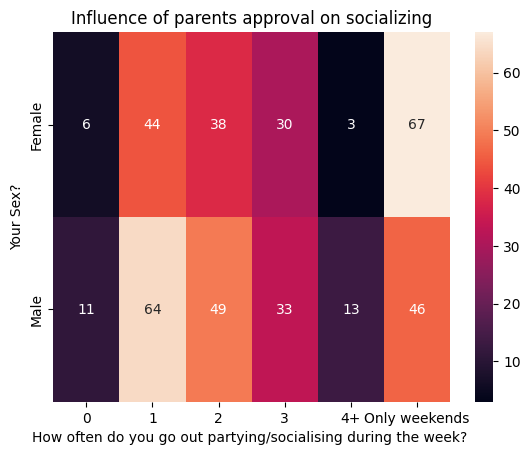

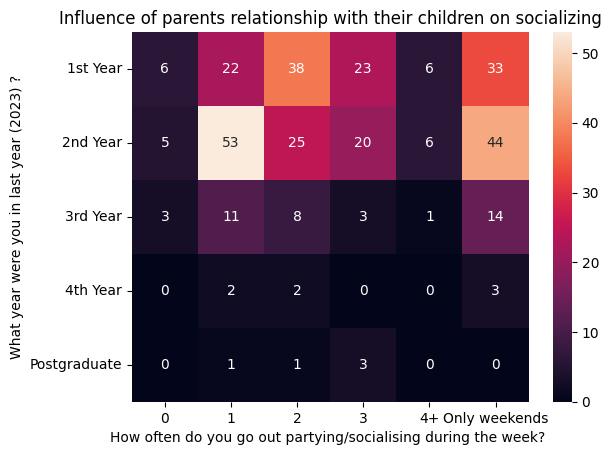

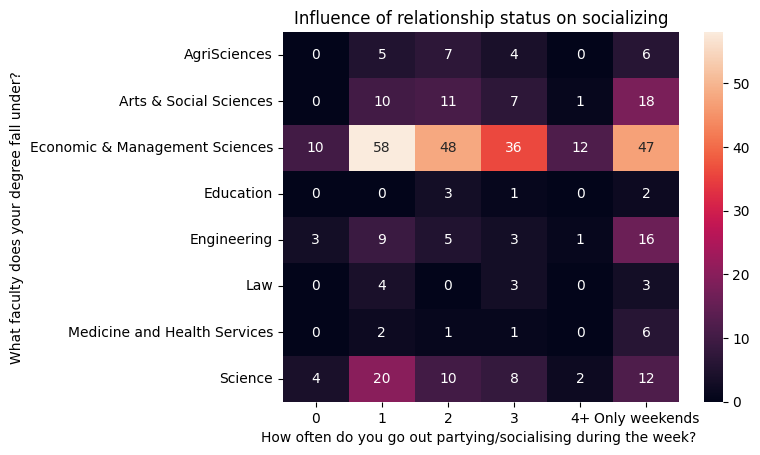

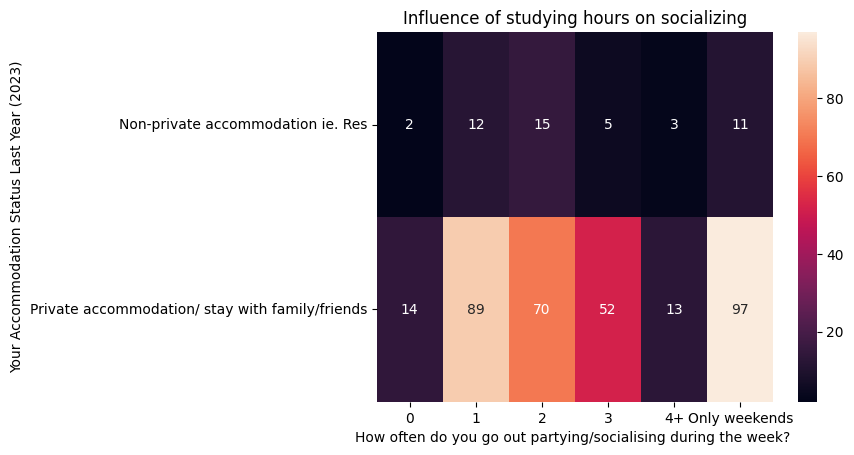

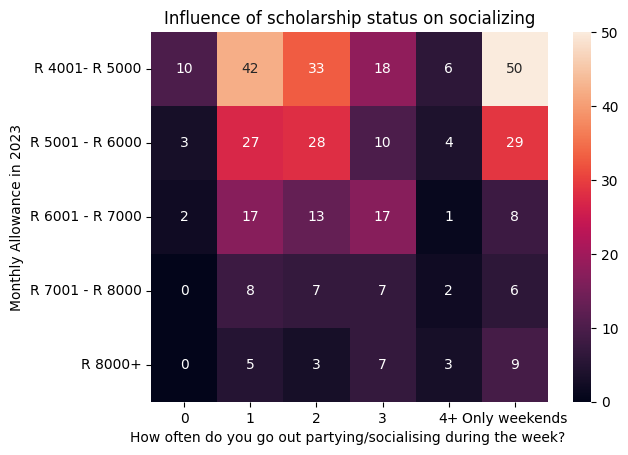

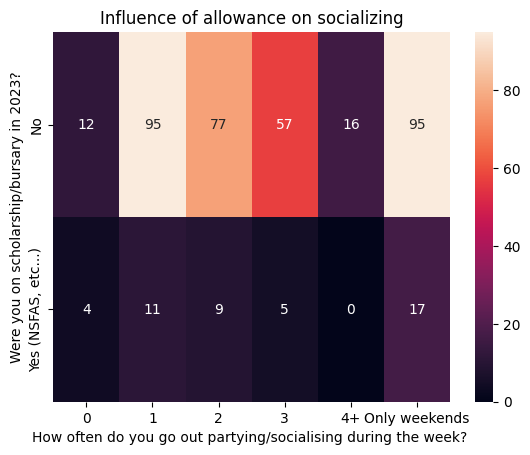

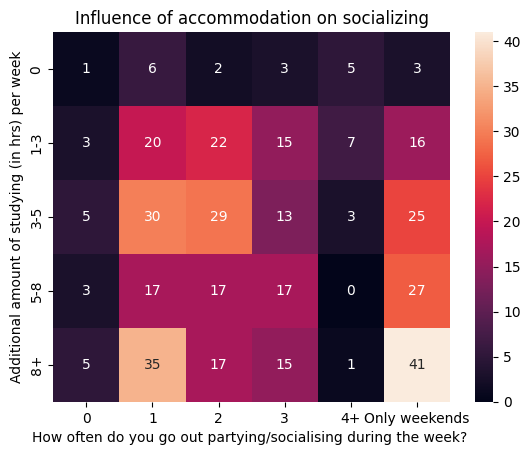

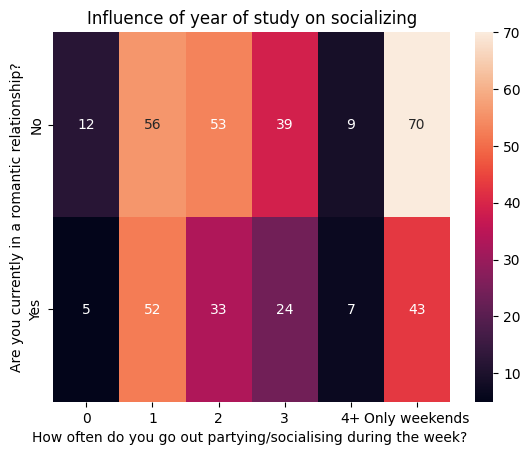

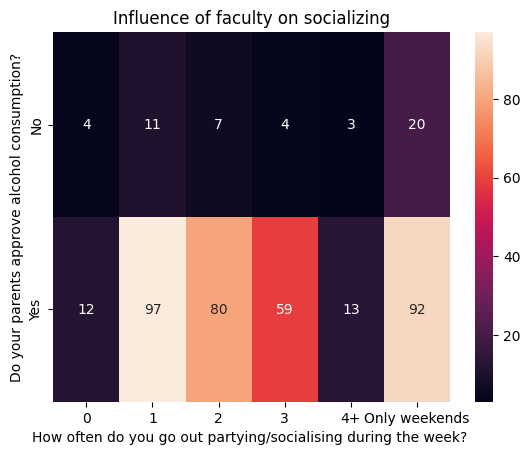

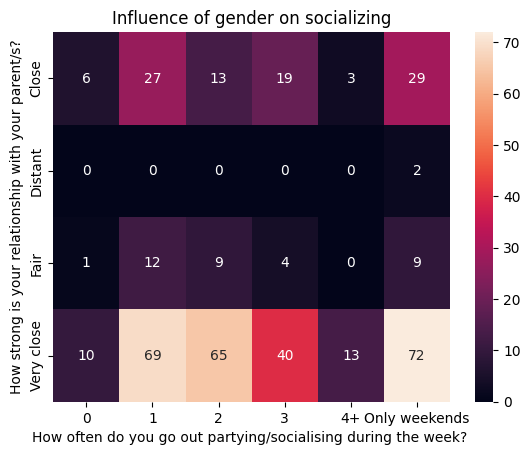

In [5]:
selected_columns = [1, 3, 4, 6, 7, 8, 9, 14, 15, 16]
initials = ['parents approval', 'parents relationship with their children',
           'relationship status', 'studying hours', 'scholarship status', 'allowance',
           'accommodation', 'year of study', 'faculty', 'gender']


for i, j in enumerate(selected_columns):    
    cross = pd.crosstab(raw_data[raw_data.columns[j]], raw_data[raw_data.columns[10]])
    sns.heatmap(cross, annot=True)
    plt.title(f'Influence of {initials[i]} on socializing')
    plt.show()

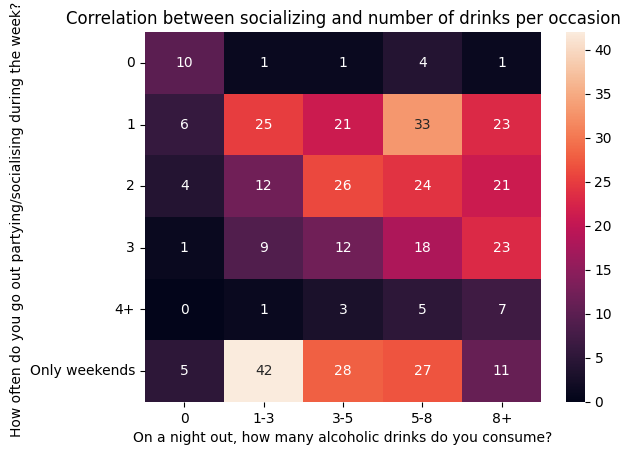

In [6]:
sns.heatmap(pd.crosstab(raw_data[raw_data.columns[10]], raw_data[raw_data.columns[11]]), annot=True)
plt.title('Correlation between socializing and number of drinks per occasion')
plt.show()

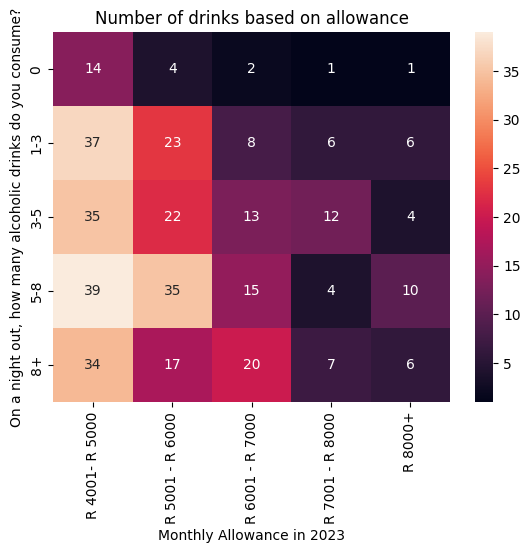

In [7]:
sns.heatmap(pd.crosstab(raw_data[raw_data.columns[11]], raw_data[raw_data.columns[7]]), annot=True)
plt.title('Number of drinks based on allowance')
plt.show()

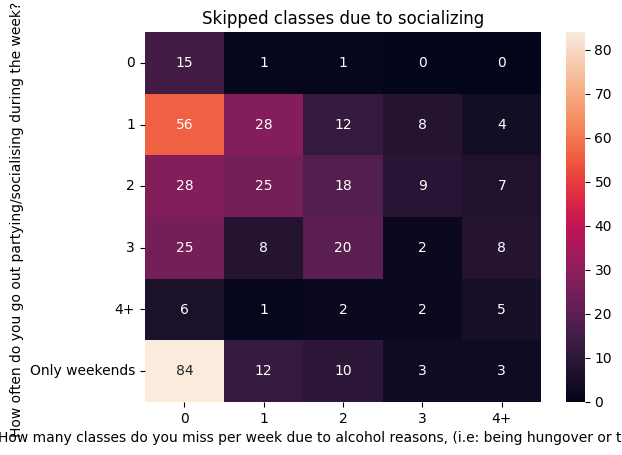

In [8]:
sns.heatmap(pd.crosstab(raw_data[raw_data.columns[10]], raw_data[raw_data.columns[12]]), annot=True)
plt.title('Skipped classes due to socializing')
plt.show()

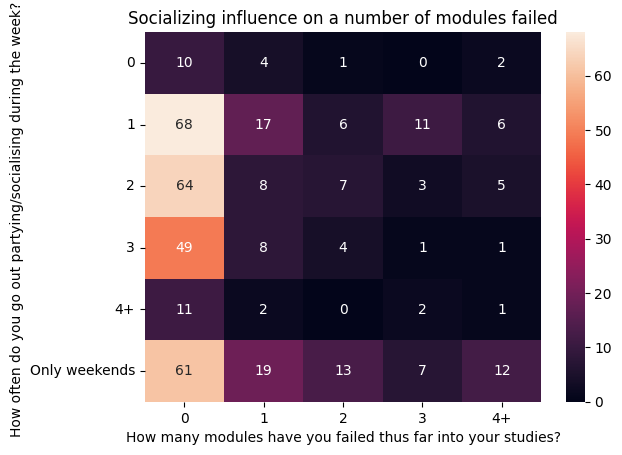

In [9]:
sns.heatmap(pd.crosstab(raw_data[raw_data.columns[10]], raw_data[raw_data.columns[13]]), annot=True)
plt.title('Socializing influence on a number of modules failed')
plt.show()

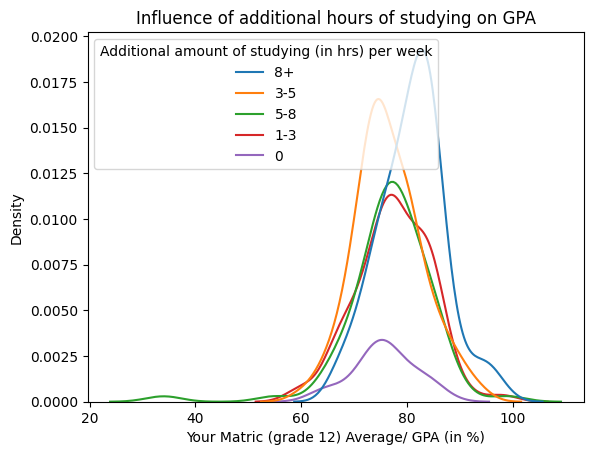

In [10]:
sns.kdeplot(raw_data, x=raw_data.columns[2], hue=raw_data.columns[9])
plt.title('Influence of additional hours of studying on GPA')
plt.show()

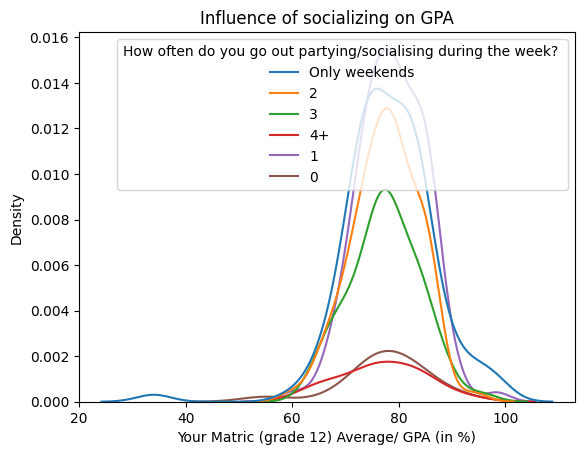

In [11]:
sns.kdeplot(raw_data, x=raw_data.columns[2], hue=raw_data.columns[10])
plt.title('Influence of socializing on GPA')
plt.show()

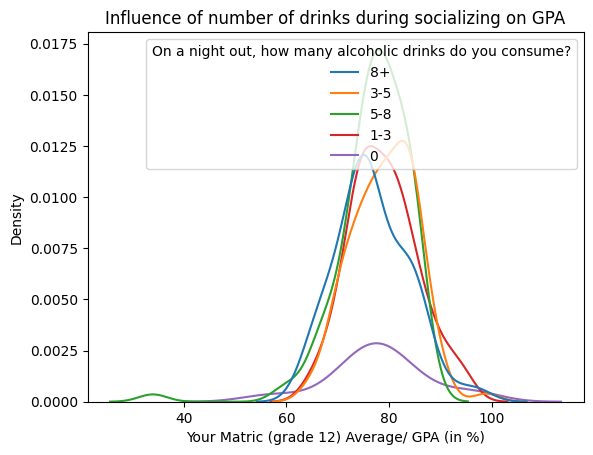

In [12]:
sns.kdeplot(raw_data, x=raw_data.columns[2], hue=raw_data.columns[11])
plt.title('Influence of number of drinks during socializing on GPA')
plt.show()

### 1.2 DAG diagram

Only few of the features are choosen to be used in our models - in our opinion the most influential ones for the student performance.
A DAG is created to illustrate the relationships between that features and the target variable (GPA).

<p align="center">
    <img src="images/DAG_.png" width=800px/ >
</p>

**Legend:**
* Colours meaning:
    * Green - ordered categorical variable,
    * Red  - binary variable,
    * Orange - target (real variable).
    
* Lines meaning:
    * Continuous line - association between block,
    * Dashed line - weak association between data.

* Bold framed features are used in the models.

### 1.2 Confoundings  

* Fork    

    * "Drinks consummed at the party" feature is common cause for "Studying hours" and "Missed classes",
    * "Hangouts" influences both "Drinks consummed at the party" and "Studying hours".

* Collider   

    * "Studying hours" is infulenced by "Hangouts" and "Drinks consummed at the party",
    * "Drinks consummed at the party" is influenced by "Hangouts" and "Parents alcohol approvement",
    * "GPA" is influenced by "Studying hours", "Missed classes", "Drinks consummed at the party", "Studying hours", "Hangouts". 

* Pipe

    * "Parents alcohol approvement" can influence "Drinks consummed at the party" and is transmited to "GPA".

## 2. Data preprocessing - simplification and cleaning
Despite using only few of the features, the whole data set is preprocessed for the sake of completeness. The following steps are taken:

* timestamp column will be dropped as it doesn't give any useful information for our purposes,
* to work with the gathered data, we’ll simplify column names for easier reference, this practice improves readability and reduces typing effort,
* rows containing NaN or missing values will be dropped, this ensures that our dataset remains clean and accurate,
* values described by two options (e.g., “yes” and “no”), will be converted  to binary format ("0" or "1"), it simplifies the representation,
* values describing incremental features (e.g., “very close,” “close,” “fair,” “distant”) will be mapped to numerical values ("3", "2", "1", "0"), same thing will be applied to values with range format,
* the value “Only weekends” describing social activities will be changed to “1” for simplification, even though it differs from the actual value “1” (which represents drinking on weekdays, because it can have less influence on academic performance),
* faculties will be ranked subjectively from easiest to hardest for passing.

In [13]:
data = raw_data.copy()

columns_names = {
    data.columns[1]: "Gender",
    data.columns[2]: "Current GPA",
    data.columns[3]: "Year",
    data.columns[4]: "Faculty",
    data.columns[5]: "Prior GPA",
    data.columns[6]: "Accommodation",
    data.columns[7]: "Allowance",
    data.columns[8]: "Scholarship",
    data.columns[9]: "Studying hours",
    data.columns[10]: "Hangouts",
    data.columns[11]: "Drinks",
    data.columns[12]: "Missed classes",
    data.columns[13]: "Failed modules",
    data.columns[14]: "Relationship",
    data.columns[15]: "Parents approvement",
    data.columns[16]: "Relationship with parents",}

data.rename(columns = columns_names, inplace=True)
data = data.drop('Timestamp', axis=1)
data.head()

,Gender,Current GPA,Year,Faculty,Prior GPA,Accommodation,Allowance,Scholarship,Studying hours,Hangouts,Drinks,Missed classes,Failed modules,Relationship,Parents approvement,Relationship with parents
0,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [14]:
# Check data for unique values, NaN and missing values
for column in data:
    print(data[column].unique())

['Female' 'Male' nan]
[76.   89.   74.   83.   80.   85.   75.   79.   72.   78.   87.   86.
 69.   73.   84.   99.   82.6  65.   81.   88.   70.   98.   90.   98.33
   nan 82.   77.   68.   66.   92.   91.86 71.   63.   67.   60.   94.
 95.   34.   86.4  95.5  55.   91.21 96.   64.  ]
['2nd Year' '1st Year' nan '3rd Year' '4th Year' 'Postgraduate']
['Arts & Social Sciences' 'Economic & Management Sciences' 'AgriSciences'
 'Engineering' 'Science' 'Medicine and Health Services' 'Law' 'Education'
 nan]
[72.   75.   55.   84.   52.     nan 54.   64.   76.   65.   62.   69.
 60.   74.   70.   63.   73.   57.   90.   78.   61.   89.   80.   66.
 58.   95.22 71.   53.   50.   88.   79.   56.   51.   68.   77.   65.89
 73.5  59.   67.   92.   87.6  83.   30.   81.   69.7  85.  ]
['Private accommodation/ stay with family/friends' nan
 'Non-private accommodation ie. Res']
['R 4001- R 5000' 'R 7001 - R 8000' 'R 6001 - R 7000' 'R 5001 - R 6000'
 nan 'R 8000+']
['No' 'Yes (NSFAS, etc...)' nan]
['8

In [15]:
data.dropna(axis=0, how='any', inplace=True)

gender_map = {
    'Female': 1,
    'Male': 0
}

year_map = {
    '1st Year': 0,
    '2nd Year': 1,
    '3rd Year': 2,
    '4th Year': 3,
    'Postgraduate': 4
}

faculty_map = {
    'AgriSciences': 0,
    'Arts & Social Sciences': 1,
    'Education': 2,
    'Economic & Management Sciences': 3,
    'Medicine and Health Services': 4,
    'Science': 5,
    'Engineering': 6,
    'Law': 7
}

accommodation_map = {
    'Private accommodation/ stay with family/friends': 1,
    'Non-private accommodation ie. Res': 0
}

allowance_map = {
    'R 4001- R 5000': 0,
    'R 5001 - R 6000': 1,
    'R 6001 - R 7000': 2,
    'R 7001 - R 8000': 3,
    'R 8000+': 4,
}

scholarship_map = {
    'Yes (NSFAS, etc...)' : 1,
    'No' : 0
}

study_hours_map = {
    '0': 0,
    '1-3': 1,
    '3-5': 2,
    '5-8': 3,
    '8+': 4
}

hangouts_map = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4+': 4,
    'Only weekends' : 1
}

drinks_map = {
    '0': 0,
    '1-3': 1,
    '3-5': 2,
    '5-8': 3,
    '8+': 4
}

missed_classes_map = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4+': 4
}

failed_modules_map = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4+': 4
}

relationship_map = {
    'Yes' : 1,
    'No' : 0
}

parents_approvement_map = {
    'Yes' : 1,
    'No' : 0
}

parents_relationship_map = {
    'Distant' : 0,
    'Fair' : 1,
    'Close' : 2,
    'Very close' : 3
}

maps = {
    'Gender': gender_map,
    'Year': year_map,
    'Faculty': faculty_map,
    'Accommodation': accommodation_map,
    'Allowance': allowance_map,
    'Scholarship': scholarship_map,
    'Studying hours': study_hours_map,
    'Hangouts': hangouts_map,
    'Drinks': drinks_map,
    'Missed classes': missed_classes_map,
    'Failed modules': failed_modules_map,
    'Relationship': relationship_map,
    'Parents approvement': parents_approvement_map,
    'Relationship with parents': parents_relationship_map
}

for column in data:
    if column not in ['Current GPA', 'Prior GPA']:
        data[column] = data[column].map(lambda x: maps[column].get(x, x))
        
data.head()

,Gender,Current GPA,Year,Faculty,Prior GPA,Accommodation,Allowance,Scholarship,Studying hours,Hangouts,Drinks,Missed classes,Failed modules,Relationship,Parents approvement,Relationship with parents
0,1,76.0,1,1,72.0,1,0,0,4,1,4,3,0,1,1,3
1,0,89.0,1,3,75.0,1,3,1,4,1,2,4,0,0,1,3
2,0,76.0,0,0,55.0,1,0,0,2,2,4,3,0,0,1,3
3,0,89.0,1,6,84.0,1,2,0,2,3,4,2,0,1,1,3
4,1,74.0,1,1,52.0,1,0,0,2,1,3,1,3,0,1,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 0 to 402
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     295 non-null    int64  
 1   Current GPA                295 non-null    float64
 2   Year                       295 non-null    int64  
 3   Faculty                    295 non-null    int64  
 4   Prior GPA                  295 non-null    float64
 5   Accommodation              295 non-null    int64  
 6   Allowance                  295 non-null    int64  
 7   Scholarship                295 non-null    int64  
 8   Studying hours             295 non-null    int64  
 9   Hangouts                   295 non-null    int64  
 10  Drinks                     295 non-null    int64  
 11  Missed classes             295 non-null    int64  
 12  Failed modules             295 non-null    int64  
 13  Relationship               295 non-null    int64  
 14 

In [17]:
data = data.reset_index()

In [18]:
data.to_csv('data/survey_cleaned.csv', index=False, sep=',')

## 3. Model - differences between models and justification
For the purpose of this project, two statistical models are developed, each utilizing a different probability distribution for predicted student's performance.

First model take in information about studying hours, average alcohol consumption per hangout and hangouts during the week. We assumed a **normal distribution** for this model.  

The second model uses the same inputs however, results are modeled as **beta distribution**.


Our justification for choosing these distributions is as follows:
- The normal distribution is selected for the first model, because it is particularly effective in modeling phenomena where outcomes tend to cluster around a central mean. This characteristic makes this distribution suitable for predicting GPA when we assume that the GPA scores are influenced by a variety of factors that have a cumulative effect, leading to a clustering of scores around a mean value.

- On the other hand, the Beta distribution is chosen for the second model because of its flexibility and the nature of its defining parameters, α (alpha) and β (beta). These parameters allow the beta distribution to assume a wide range of shapes, including uniform, U-shaped, or J-shaped distributions, making it exceptionally versatile for modeling data. Given that the beta distribution is confined to the interval [0, 1], it is particularly useful at modeling variables with limited domain. This makes it a good choice for modeling GPA which is a score in range from 0 to 100 percent.

### 3.1 First model - specification and description
This model is a Bayesian linear regression model implemented in Stan, aiming to predict a continuous outcome (GPA) based on three predictors: hours of study, amount of socializing activities (hangouts), and average amount of drinks consumed during them. The model uses a linear combination of these predictors, each weighted by a coefficient, to estimate the GPA. Priors for the coefficients and the shift term follow normal distributions. The model calculates the expected GPA for each observation and assesses the likelihood of the observed GPAs given these expectations.

**Inputs**:
* N - number of observations,
* gpa[N] - continuous outcome representing the GPA of each student, constrained between 0 and 100,
* hours[N] - fisrt predictor, representing the number of hours a student works, constrained between 0 and 4.
* hangouts[N] - second predictor, representing the amount of socializing activities, constrained between 0 and 4,
* drinks[N] - third predictor, representing the amount of consumed drinks at one party, constrained between 0 and 4.


**Parameters**: 
* $\theta_{1}$ - shift coeficient of the linear model,
* $\theta_{2}$  - coefficient for the hours predictor,
* $\theta_{3}$  - coefficient for the hangouts predictor,
* $\theta_{4}$  - coefficient for the drinks predictor,
* $\sigma$ - standard deviation of the GPA predictions constrained to be positive.

**Transformed parameters**:

* i $\in$ [0, N]
* $\mu$[i] = $\theta_{1}$ + $\theta_{2}$ * hours[i] + $\theta_{3}$ * hangouts[i] + $\theta_{4}$ * drinks[i]

**Model**:

$$\theta_{1} \sim Normal(70, 3)$$
$$\theta_{2} \sim Normal(1.5, 0.2)$$
$$\theta_{3} \sim Normal(-0.5, 0.3)$$
$$\theta_{4} \sim Normal(-0.75, 0.3)$$
$$\sigma \sim Normal(5, 0.5)$$
$$gpa[i] \sim Normal(\mu[i], \sigma)$$


**Quantities generation**:

* predicted_gpa = fmax(fmin(normal_rng(mu[i],sigma), 100), 0)

### 3.2 Second model  - specification and description
This model is a Bayesian hierarchical model designed to predict a scaled GPA (ranging from 0 to 1) based on three predictors: hours of study, amount of socializing activities (hangouts), and average amount of drinks consumed during them. Unlike traditional linear regression models, this model uses a beta distribution for the outcome variable, making it suitable for modeling outcomes that fall within a bounded interval [0, 1].

**Inputs**:
* N - number of observations,
* scaled_gpa[N] - conttinous outcome variable, representing scaled GPA, constrained between 0 and 1,
* hours[N] - fisrt predictor, representing the number of student's study hours, constrained between 0 and 4,
* hangouts[N] - second predictor, representing the amount of socializing activities, constrained between 0 and 4,
* drinks[N] - third predictor, representing the amount of consumed drinks at one party, constrained between 0 and 4.

**Parameters**:
* $\theta_{1}$ - factor for the shape parameter alpha.
* $\theta_{2}$ - coefficient for the hours predictor,
* $\theta_{3}$ - factor for the shape parameter beta,
* $\theta_{4}$ - coefficient for the hangouts predictor,
* $\theta_{5}$ - coefficient for the drinks predictor.

**Transformed Parameters**:

* i $\in$ [0, N]
* $\alpha[i] =  \theta_{1} + \theta_{2} * hours[i]$
* $\beta[i] =  \theta_{3} + \theta_{4} * hangouts[i] + \theta_{5} * drinks[i]$

**Model**:
$$\theta_{1} \sim LogNormal(3.63, 0.02)$$
$$\theta_{2} \sim LogNormal(0.4, 0.1)$$
$$\theta_{3}  \sim LogNormal(2.3, 0.1)$$
$$\theta_{4} \sim LogNormal(0.01, 0.1)$$
$$\theta_{5} \sim LogNormal(0.01, 0.1)$$
$$scaled\_gpa[i] \sim Beta(\alpha[i], \beta[i])$$


**Generated Quantities**:
* predicted_scaled_gpa[i] = beta_rng(alpha[i], beta[i])

## 4. Priors
The choice of prior distributions is based on common statistical assumptions about the nature of the given data and the factors influencing the parameter of interest.

In order to compare the results obtained from the prior distribution, the histogram of the observed GPA values is presented. Additionally, the average value was calculated along with the standard deviation.

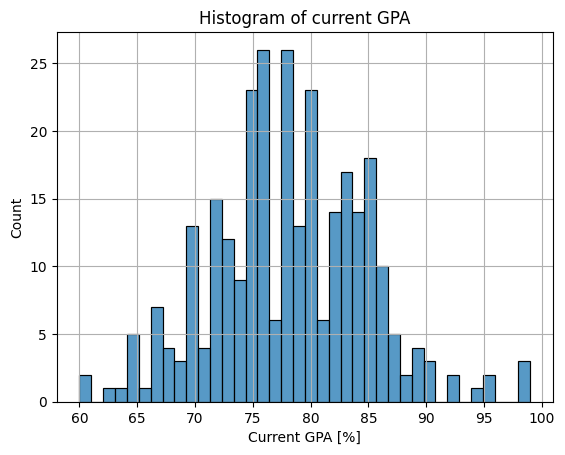

Mean value of Current GPA:  78.20959322033899
Std. value of Current GPA:  6.5774609349637565


In [19]:
sns.histplot(data['Current GPA'], bins=len(data['Current GPA'].unique()))
plt.xlabel('Current GPA [%]')
plt.title('Histogram of current GPA')
plt.grid()
plt.show()

print("Mean value of Current GPA: ", data['Current GPA'].mean())
print("Std. value of Current GPA: ", data['Current GPA'].std())

### 4.1 Priors for the first model

**theta_1 shift coefficient**:
The main factor influencing the predicted_gpa value is the theta_1 shift defined by a normal distribution with the mean of 75%. The coefficient was chosen based on general knowledge of the students' average performance.

**theta_2 "Studying Hours" predictor coefficient**:
The normal distribution is chosen for scaling continuous variables like studying hours because it’s a common assumption that such variables tend to follow a bell-shaped distribution in a population. The values from the dataset were multiplied by a distribution centred on the coefficient theta_2, which is, so to speak, a ‘weigh’ for the input value of ‘hours’ and thus determines the impact of the hours spent on the overall predicted GPA.

**theta_3 "Hangouts" predictor coefficient**: 
Analogous to the previous parameter, for the "hangouts" input, a negative weight was chosen because, as is generally known, going out and spending time on meetings and entertainment instead of studying has a negative impact on the overall outcome of the study. 

**theta_4 "Drinks" predictor coefficient**: 
Prior for "drinks" input is chosen in the same way as "hangouts" but was defined as greater because alcohol has a bigger impact on negative outcomes than simply spending time having fun.

**sigma**:
The standard deviation parameter sigma, also defined using a normal distribution, based on knowledge of the variability of the mean distribution among students

**Predicted GPA**: 
The predicted GPA is generated using a normal distribution where the mean is a linear combination of studying hours, hangouts, drinks and theta_1 as shift coeficient of the linear model. This factor has the greatest influence on the predicted values, having been selected on the basis of general knowledge of the average student grade, which fluctuates around 70%. A sigma value is used to ensure that the generated GPAs are densely packed around the mean, reflecting the expectation that most GPAs will be close to the average with some variation.

**Generated quantities:**

* real theta_1 = normal_rng(75, 3);
* real theta_2 = normal_rng(1.5, 0.2);
* real theta_3 = normal_rng(-0.5, 0.3);
* real theta_4 = normal_rng(-0.75, 0.3);
* real sigma = normal_rng(5, 0.5);

**Formula:** 

predicted_gpa[i] = fmax(fmin(normal_rng(theta_1 + theta_2 * hours[i] + theta_3 * hangouts[i] + theta_4 * drinks[i], sigma), 100), 0);

#### 4.1.1 Generating samples
The number of iterations was chosen based on the number of records in the data. We choose 10 observations for samples generation.

In [20]:
seed = np.random.seed(2024)
R = 295
N = 10

We are generating random input data, in range as specified in preproccesing part. 

In [21]:
hours_array = list(np.random.choice(range(5), 10))
hangouts_array = list(np.random.choice(range(5), 10))
drinks_array = list(np.random.choice(range(5), 10))

In [22]:
prior_model_1 = CmdStanModel(stan_file='src/prior_model_1.stan')

data_simulated = {'N': N,
                  'hours': hangouts_array,
                  'hangouts': hours_array,
                  'drinks': drinks_array,
                  }  
samples_model_1 = prior_model_1.sample(data=data_simulated,
                                       iter_sampling=R,
                                       iter_warmup=1,
                                       chains=1,
                                       fixed_param=True,
                                       seed=seed,
                                       refresh=R)

21:48:59 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

21:48:59 - cmdstanpy - INFO - CmdStan done processing.


In [23]:
df_1 = samples_model_1.draws_pd()
df_1.head()

,chain__,iter__,draw__,lp__,accept_stat__,predicted_gpa[1],predicted_gpa[2],predicted_gpa[3],predicted_gpa[4],predicted_gpa[5],predicted_gpa[6],predicted_gpa[7],predicted_gpa[8],predicted_gpa[9],predicted_gpa[10],theta_1,theta_2,theta_3,theta_4,sigma
0,1.0,1.0,1.0,0.0,0.0,87.1945,82.4720,78.6797,90.4646,69.2601,71.6296,74.5480,74.2222,84.2830,71.6085,75.0250,1.22375,-0.552588,-0.822116,5.30104
1,1.0,2.0,2.0,0.0,0.0,76.5240,87.9336,66.0437,73.9284,73.1384,66.1700,66.2321,70.9258,71.3920,72.4847,76.5132,1.26041,-0.975017,-0.995692,5.82057
2,1.0,3.0,3.0,0.0,0.0,70.1431,65.3578,72.2943,75.0119,66.8384,71.0107,66.3994,66.4769,71.2728,76.1827,70.0322,1.55282,-0.392410,-0.531868,5.49241
3,1.0,4.0,4.0,0.0,0.0,80.0519,84.6064,67.5036,73.2220,83.8558,65.3867,78.7078,93.2576,75.6067,75.7739,77.7456,1.66126,0.038159,-0.896473,5.01844
4,1.0,5.0,5.0,0.0,0.0,84.0740,73.2110,76.4023,83.9530,75.3797,78.8754,83.7649,85.5231,82.7025,70.0309,76.3724,1.54845,-0.687287,-0.491028,5.20487


#### 4.1.2 Prior predictive checks for parameters and measurements

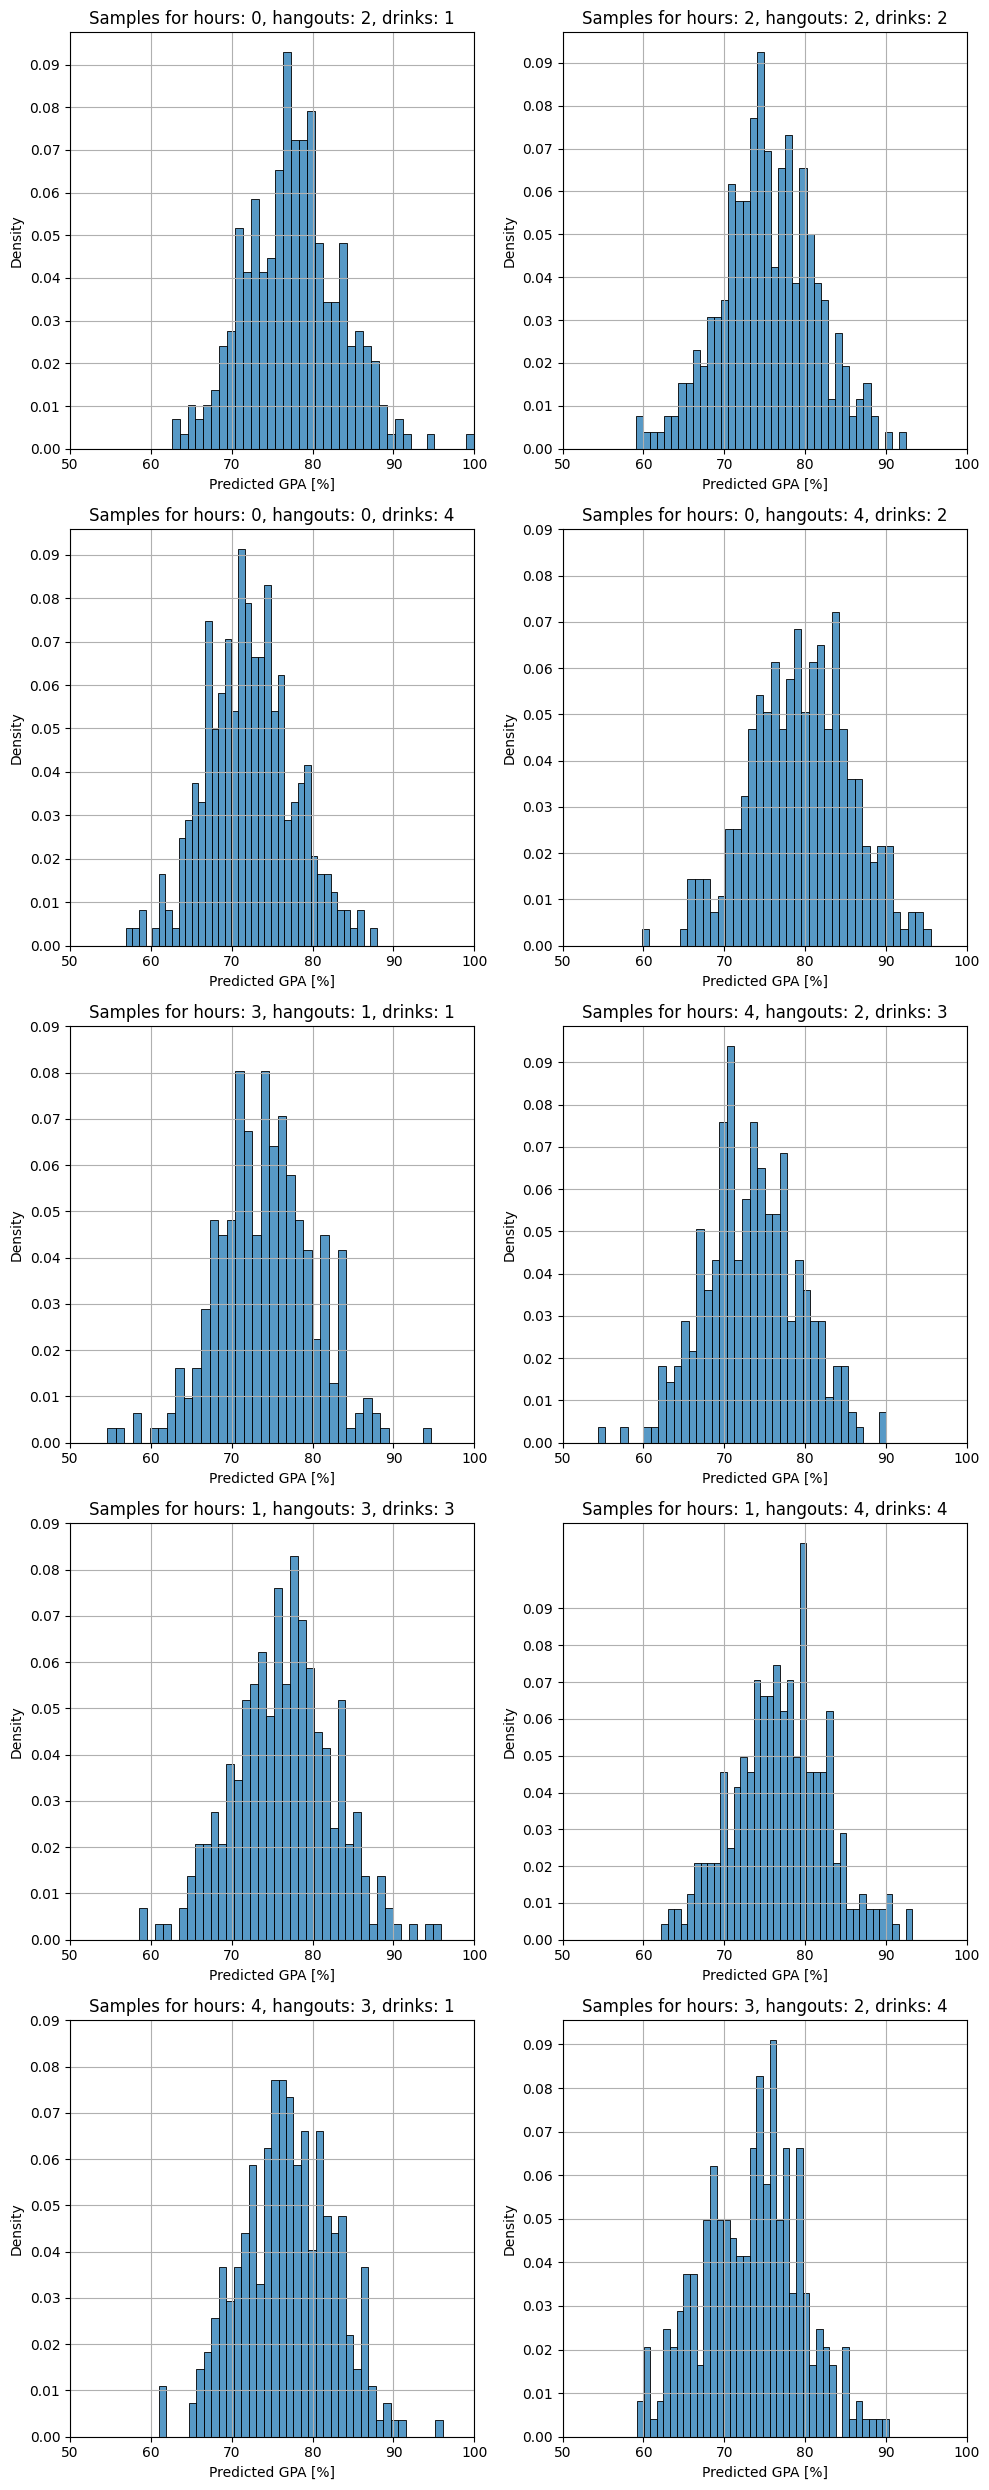

In [24]:
columns = [f'predicted_gpa[{i+1}]' for i in range(10)]

fig, axes = plt.subplots(5, 2, figsize=(10, 25))

for i, column in enumerate(columns):    
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(df_1[column], ax=ax, bins=len(data['Current GPA'].unique()), stat='density')
    
    ax.set_title(f'Samples for hours: {hours_array[i]}, hangouts: {hangouts_array[i]}, drinks: {drinks_array[i]}')
    ax.set_xlabel('Predicted GPA [%]')
    ax.set_xticks(range(50, 101, 10))
    ax.set_xlim(50, 100)
    ax.set_yticks(np.linspace(0, 0.09, 10))
    ax.grid()

plt.tight_layout()
plt.show()

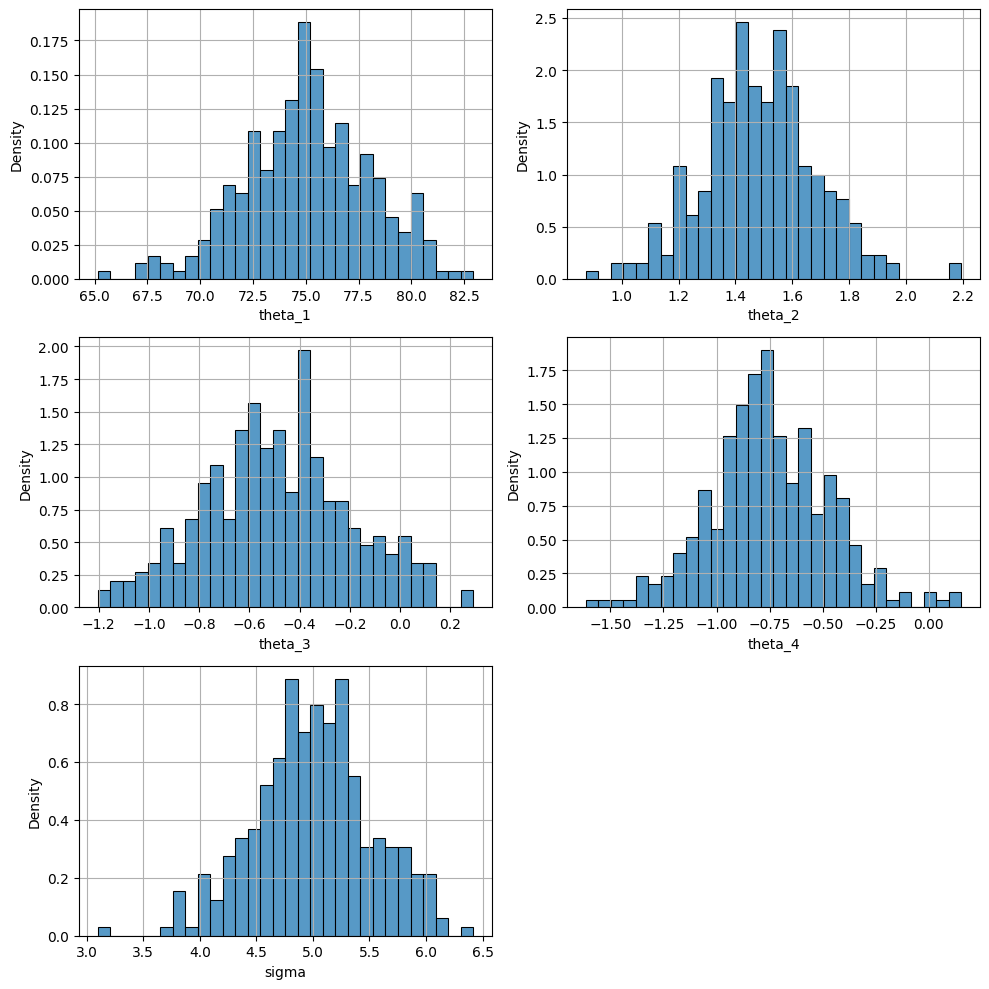

In [25]:
parameters = ['theta_1', 'theta_2', 'theta_3', 'theta_4', 'sigma']

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, param in enumerate(parameters):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(df_1[param], ax=ax, bins=30, stat='density')
    ax.grid()

fig.delaxes(axes[2][1])
plt.tight_layout()
plt.show()

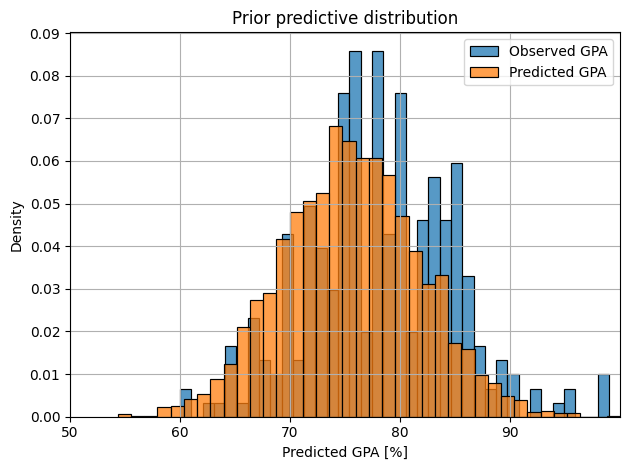

In [26]:
sns.histplot(data['Current GPA'], bins=len(data['Current GPA'].unique()), stat='density')
sns.histplot(samples_model_1.stan_variable('predicted_gpa').flatten(), bins=len(data['Current GPA'].unique()), stat='density')
plt.title(f'Prior predictive distribution')
plt.xlabel('Predicted GPA [%]')
plt.legend(['Observed GPA', 'Predicted GPA'])
plt.tight_layout()
plt.xticks(range(50, 100, 10))
plt.yticks(np.linspace(0, 0.09, 10))
plt.xlim(50, 100)
plt.grid()
plt.show()

For random chosen samples prior predictive checks are performed. The histograms of the generated samples are not entirely consistent with our expectations but they seem reasonable. Distributions of coefficients (priors) are consistent with those specified in the model.

#### 4.2 Priors for the second model

**theta_1 and theta_3 shift coefficient**:
The main factors influencing the prior predicted_gpa value the theta_1 and theta_3 shift defined by a lognormal distribution. The parameters declared for lognormal distribution were chosen so that the form factors of the final beta distribution oscillate around 37 for the alpha coefficient and 10 for the beta coefficient. 

**theta_2 "Studying Hours" predictor coefficient**:
Same assumptions as in prior distribution for the first model, but a "weight" theta_2 was declared by lognormal distribution due to the fact that lognormal distribution is appropriate for variables that represent multiplicative effects. In many scenarios, underlying factors multiply rather than add. By using lognormal distributions, the model implicitly assumes that the effects of the predictors on the outcome (GPA) are multiplicative.
In addition, this distribution provides positive values, which prevents the distribution shape factor from becoming negative.

**theta_4 "Hangouts" predictor coefficient**: 
Same assumptions as in prior distribution for the first model, also distributions changed to lognormal due to the same reasons as for "studying hours" coeficient theta_2.

**theta_5 "Drinks" predictor coefficient**: 
Same assumptions as in prior distribution for the first model, also distributions changed to lognormal due to the same reasons as for "studying hours" coeficient theta_2.

**Predicted GPA**: 
For each observation, the model predicts the GPA using a beta distribution. The beta distribution is parameterized by two shape parameters, α (alpha) and β (beta), which in this model are calculated as linear combinations of the input variables (hours, hangouts, drinks) weighted by their respective coefficients (theta_2, theta_4, theta_5) and adjusted by theta_1 and theta_3.
Parameter values were chosen so that the final distribution oscillates, as in the first model, close to 70%.

The beta distribution naturally outputs values between 0 and 1, representing proportions. To convert these proportions to GPA scores on a 0-100 scale, the model multiplies the output of the beta distribution by 100. 

**Generated quantities:**

* real theta_1 = lognormal_rng(3.63, 0.02);
* real theta_3 = lognormal_rng(2.3, 0.1);
* real theta_2 = lognormal_rng(0.4, 0.1);
* real theta_4 = lognormal_rng(0.01, 0.1);
* real theta_5 = lognormal_rng(0.01, 0.1);

**Formula:** 

predicted_gpa[i] = 100 * beta_rng(theta_1 + theta_2 * hours[i], theta_3 + theta_4 * hangouts[i] + theta_5 * drinks[i]);


#### 4.2.1 Generating samples

In [27]:
prior_model_2 = CmdStanModel(stan_file='src/prior_model_2.stan')

samples_model_2 = prior_model_2.sample(data=data_simulated,
                                       iter_sampling=R,
                                       iter_warmup=1,
                                       chains=1,
                                       fixed_param=True,
                                       seed=seed,
                                       refresh=R)

21:49:01 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

21:49:01 - cmdstanpy - INFO - CmdStan done processing.


In [28]:
df_2 = samples_model_2.draws_pd()
df_2.head()

,chain__,iter__,draw__,lp__,accept_stat__,predicted_gpa[1],predicted_gpa[2],predicted_gpa[3],predicted_gpa[4],predicted_gpa[5],predicted_gpa[6],predicted_gpa[7],predicted_gpa[8],predicted_gpa[9],predicted_gpa[10],theta_1,theta_3,theta_2,theta_4,theta_5
0,1.0,1.0,1.0,0.0,0.0,78.2465,57.3515,68.2167,76.7026,81.3014,68.5013,73.0219,75.9905,80.4602,71.3558,36.2663,11.92150,1.08525,1.255580,1.054480
1,1.0,2.0,2.0,0.0,0.0,80.3372,77.8126,83.0180,82.7107,67.7212,79.9483,67.4984,69.5140,78.8148,71.9971,38.8087,10.09670,1.47213,0.917247,0.878949
2,1.0,3.0,3.0,0.0,0.0,81.1977,87.0086,69.6106,85.4700,60.9599,71.5267,83.3663,74.8963,77.7368,76.2042,39.1496,9.19199,1.56195,0.950314,1.394130
3,1.0,4.0,4.0,0.0,0.0,84.4985,70.7043,66.0209,84.7106,74.3133,65.5880,66.2767,71.9842,64.5010,83.3430,37.5798,10.59390,1.49205,1.071030,0.976014
4,1.0,5.0,5.0,0.0,0.0,75.4831,66.8469,75.8244,81.5216,66.7710,56.2329,72.2526,69.6648,71.8458,77.4633,37.3013,9.76523,1.34037,1.013530,1.140830


#### 4.2.2 Prior predictive checks for parameters and measurements

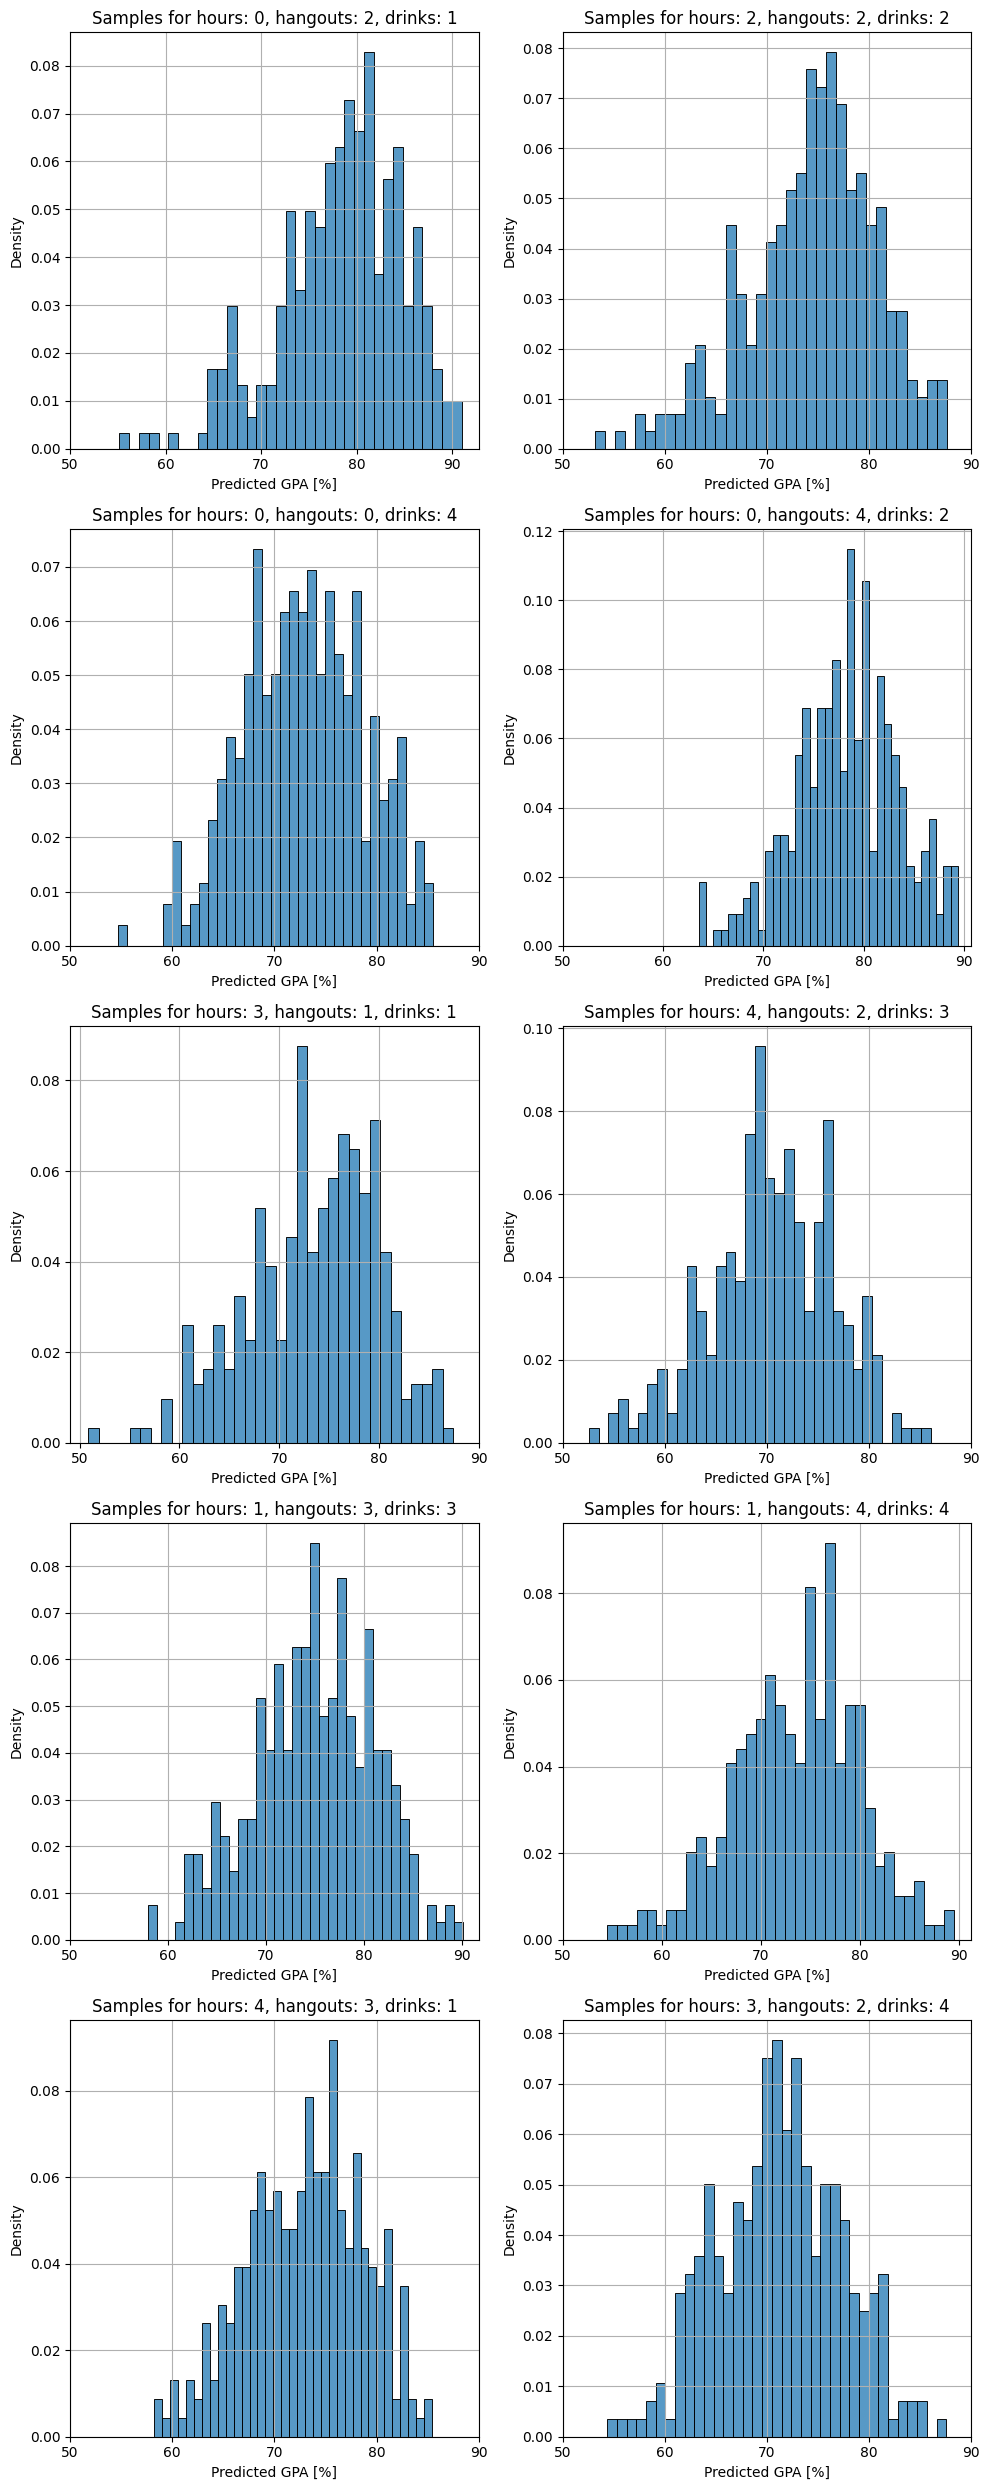

In [29]:
columns = [f'predicted_gpa[{i+1}]' for i in range(10)]

fig, axes = plt.subplots(5, 2, figsize=(10, 25))

for i, column in enumerate(columns):    
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(df_2[column], ax=ax, bins=35, stat='density')
    
    ax.set_title(f'Samples for hours: {hours_array[i]}, hangouts: {hangouts_array[i]}, drinks: {drinks_array[i]}')
    ax.set_xlabel('Predicted GPA [%]')
    ax.set_xticks(range(50, 100, 10))
    ax.grid()

plt.tight_layout()
plt.show()

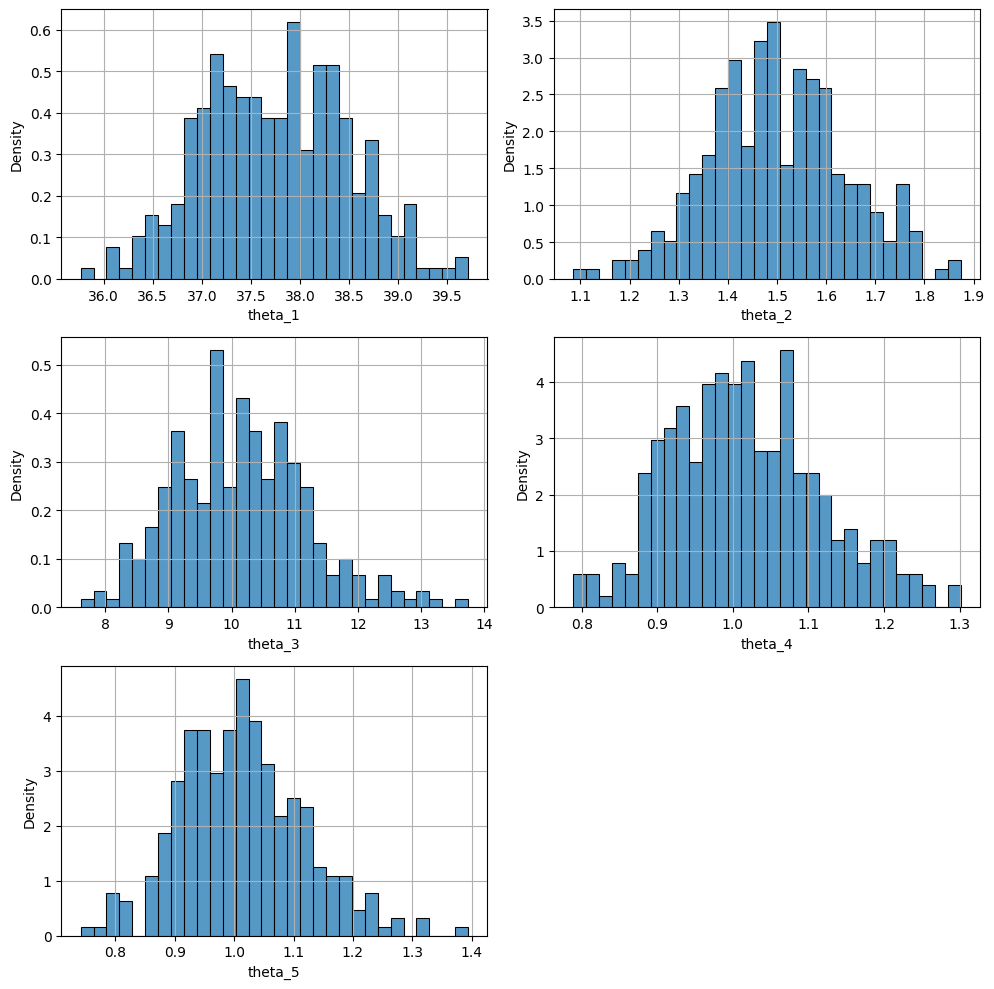

In [30]:
parameters = ['theta_1', 'theta_2', 'theta_3', 'theta_4', 'theta_5']

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, param in enumerate(parameters):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(df_2[param], ax=ax, bins=30, stat='density')
    ax.grid()

fig.delaxes(axes[2][1])
plt.tight_layout()
plt.show()

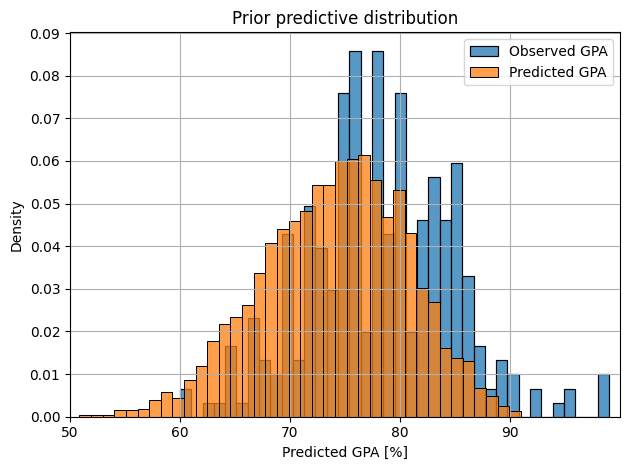

In [31]:
sns.histplot(data['Current GPA'], bins=len(data['Current GPA'].unique()), stat='density')
sns.histplot(samples_model_2.stan_variable('predicted_gpa').flatten(), bins=len(data['Current GPA'].unique()), stat='density')
plt.title(f'Prior predictive distribution')
plt.xlabel('Predicted GPA [%]')
plt.legend(['Observed GPA', 'Predicted GPA'])
plt.tight_layout()
plt.xticks(range(50, 100, 10))
plt.yticks(np.linspace(0, 0.09, 10))
plt.xlim(50, 100)
plt.grid()
plt.show()

For chosen samples prior predictive checks are performed. Again, the histograms of the generated samples are not entirely consistent with our expectations but they seem reasonable and more accurate than the first one. Distributions of coefficients (priors) are consistent with those specified in the model.

## 5. Posterior analysis for the first model

### 5.1 Sampling for first model

For the first posterior model, we encountered two important limitations during sampling. Namely, in extreme cases, the sigma predictor values, were negative, which caused errors and prevented subsequent model comparison. The second important change was that we had to introduce an upper limit for the generated GPA values, as values above 100% also appeared in extreme cases. The problem was solved using the fmin function rather than changing the predictor values, as this gave a better overall prediction.

In [32]:
indexes = np.random.choice(range(len(data)), 10, replace=False)
print("Indices: ", indexes)

Indices:  [127  86 234  76  36 195 229 292 167 173]


In [33]:
posterior_model_1 = CmdStanModel(stan_file='src/posterior_model_1.stan')

data_fit = {'N': 10, 
            'hours': (data['Studying hours'][indexes]),
            'hangouts': (data['Hangouts'][indexes]),
            'drinks': (data['Drinks'][indexes]),
            'gpa': data['Current GPA'][indexes]}

model_fit_1 = posterior_model_1.sample(data=data_fit, seed=seed)

df_3 = model_fit_1.draws_pd()
df_3.head()

21:49:02 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

21:49:02 - cmdstanpy - INFO - CmdStan done processing.
21:49:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is -4.78447, but must be positive! (in 'posterior_model_1.stan', line 34, column 8 to column 38)
	Exception: normal_lpdf: Scale parameter is -2.42815, but must be positive! (in 'posterior_model_1.stan', line 34, column 8 to column 38)
	Exception: normal_lpdf: Scale parameter is -8.19872, but must be positive! (in 'posterior_model_1.stan', line 34, column 8 to column 38)
Exception: normal_lpdf: Scale parameter is -2.48784, but must be positive! (in 'posterior_model_1.stan', line 34, column 8 to column 38)
Exception: normal_lpdf: Scale parameter is -1.75578, but must be positive! (in 'posterior_model_1.stan', line 34, column 8 to column 38)
	Exception: normal_lpdf: Scale parameter is -0.0840911, but must be positive! (in 'posterior_model_1.stan', line 34, column 8 to column 38)
	Exception: normal_lpdf: Scale parameter is -0.07921

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,...,log_likelihood[1],log_likelihood[2],log_likelihood[3],log_likelihood[4],log_likelihood[5],log_likelihood[6],log_likelihood[7],log_likelihood[8],log_likelihood[9],log_likelihood[10]
0,1.0,1.0,1.0,-26.8615,0.648947,0.773724,2.0,3.0,0.0,27.7896,...,-2.76384,-3.34750,-2.75677,-2.81159,-3.04586,-3.19685,-2.87826,-3.47483,-3.23029,-2.76384
1,1.0,2.0,2.0,-21.3516,0.935739,0.773724,2.0,7.0,0.0,27.3060,...,-2.49257,-3.92809,-2.55024,-2.72208,-3.09588,-2.97062,-2.94018,-3.34546,-3.39342,-2.49257
2,1.0,3.0,3.0,-21.9416,0.846589,0.773724,3.0,7.0,0.0,24.1588,...,-2.64715,-3.54476,-2.57088,-2.61557,-2.92427,-3.36508,-2.71091,-3.62424,-3.01557,-2.64715
3,1.0,4.0,4.0,-24.8600,0.789985,0.773724,2.0,3.0,0.0,26.4173,...,-2.52285,-3.48624,-2.46896,-2.50294,-2.80309,-3.86229,-2.54104,-3.91973,-3.13871,-2.52285
4,1.0,5.0,5.0,-24.0777,0.820808,0.773724,2.0,3.0,0.0,28.2821,...,-2.52036,-4.11515,-2.59617,-2.71741,-3.06116,-3.23272,-2.84305,-3.25854,-3.38600,-2.52036


### 5.2 Posterior predictive (marginal) checks for parameters and measurements

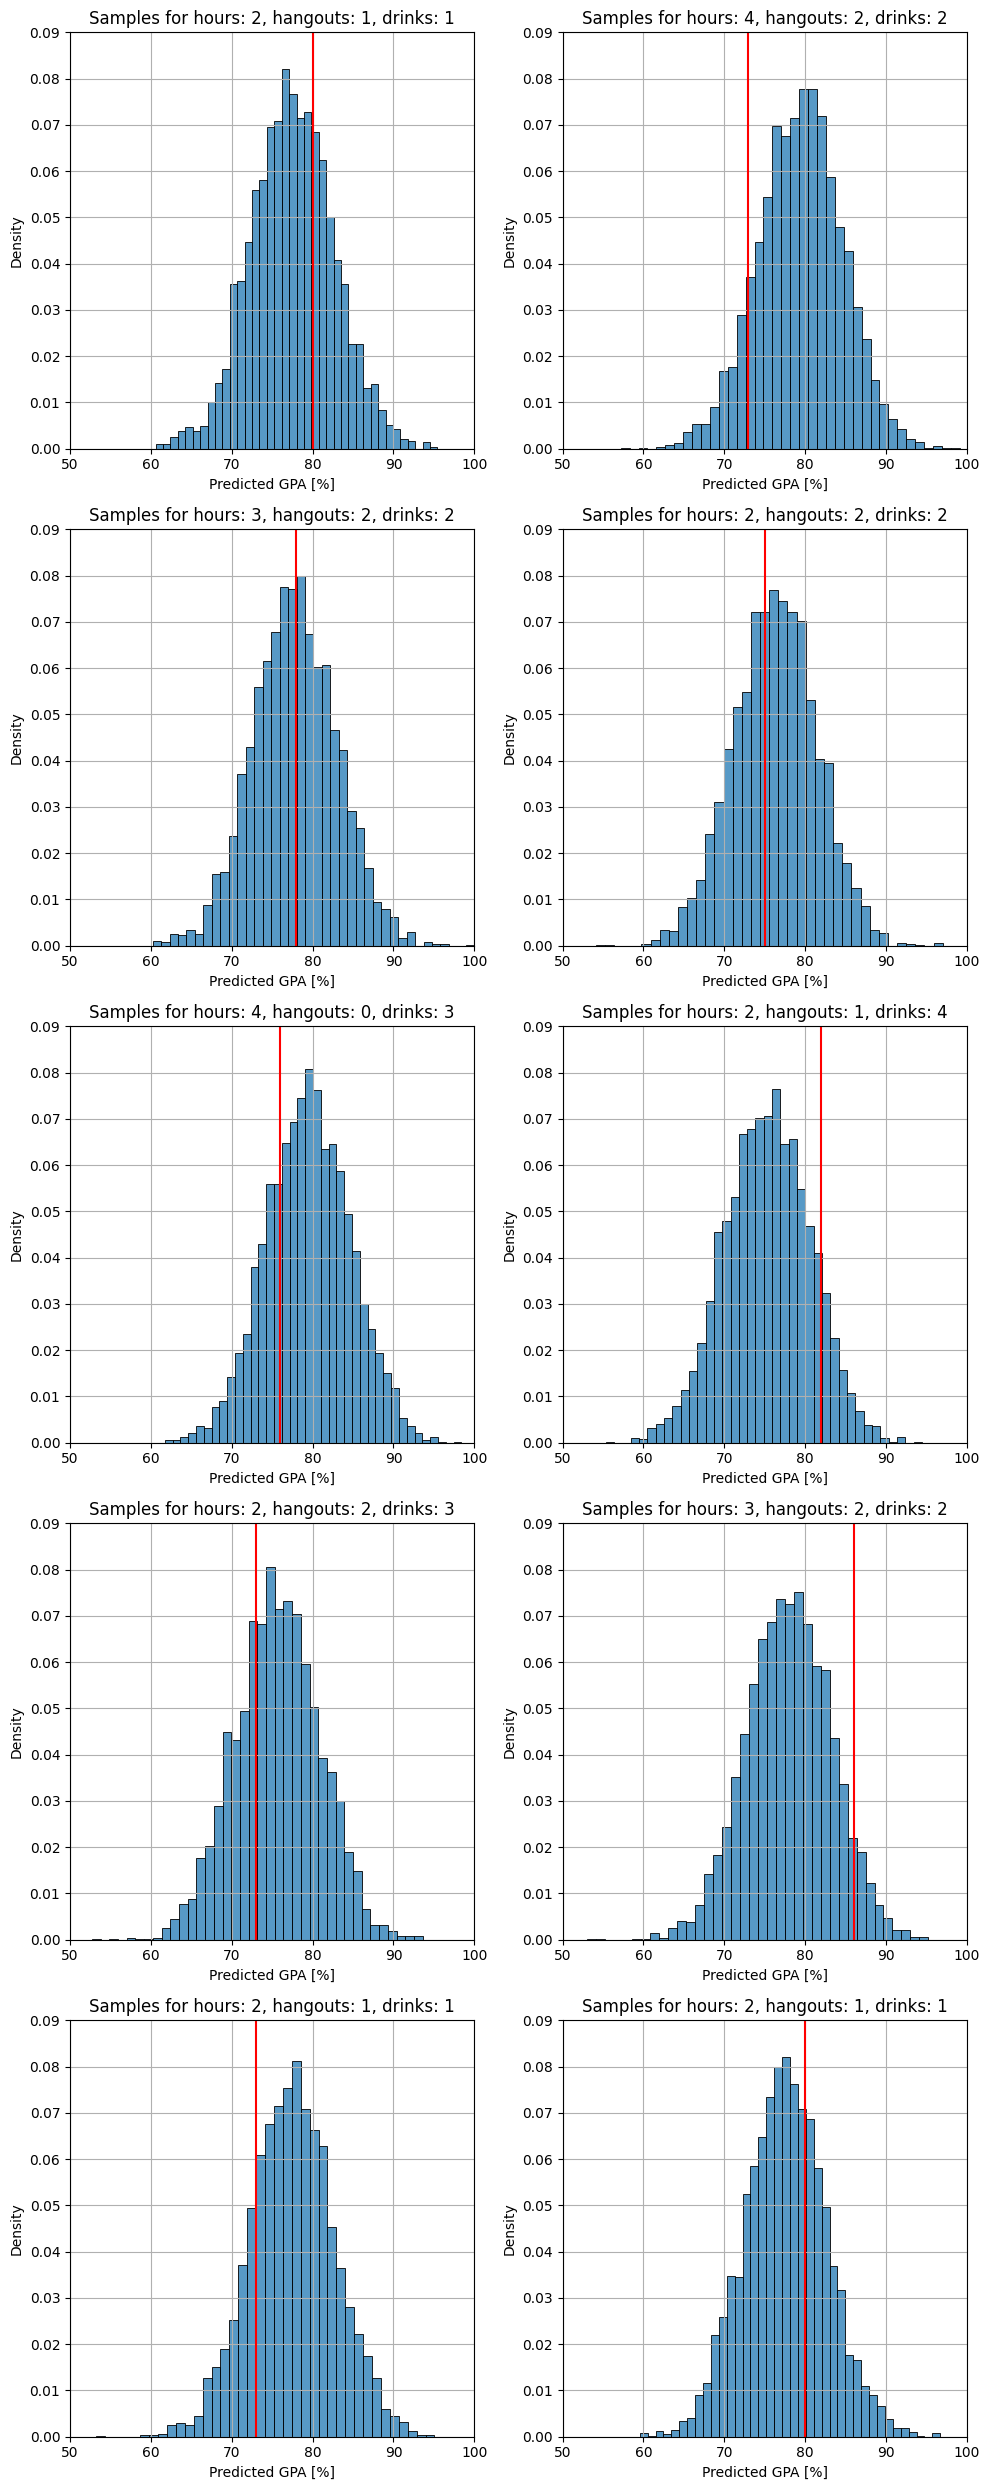

In [55]:
columns = [f'predicted_gpa[{i+1}]' for i in range(10)]

fig, axes = plt.subplots(5, 2, figsize=(10, 25))

for i, column in enumerate(columns):    
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(df_3[column], ax=ax, bins=len(data['Current GPA'].unique()), stat='density')
    ax.axvline(x = data['Current GPA'][indexes[i]],  ymin = 0, ymax = 1, color='red')
    
    ax.set_title(f'Samples for hours: {data["Studying hours"][indexes[i]]}, hangouts: {data["Hangouts"][indexes[i]]}, drinks: {data["Drinks"][indexes[i]]}')
    ax.set_xlabel('Predicted GPA [%]')
    ax.set_xticks(range(50, 101, 10))
    ax.set_xlim(50, 100)
    ax.set_yticks(np.linspace(0, 0.09, 10))
    ax.grid()

plt.tight_layout()
plt.show()

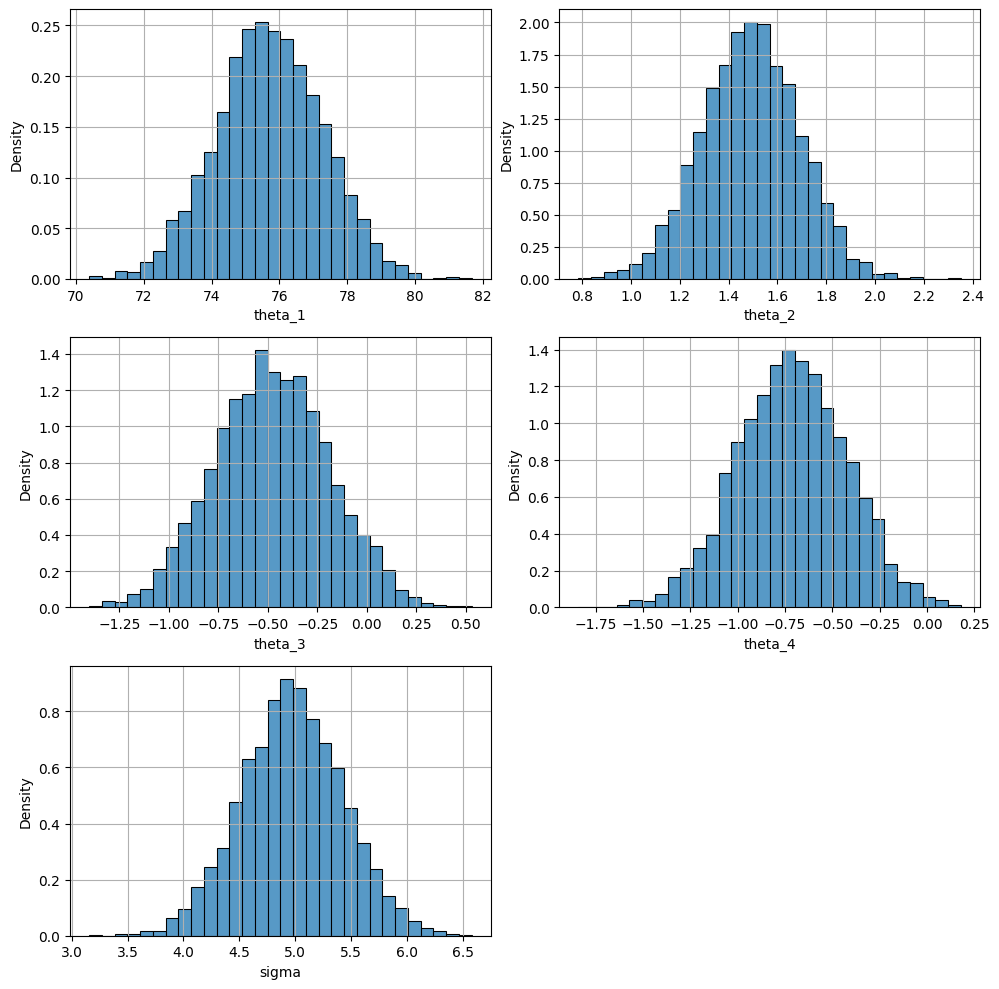

In [35]:
parameters = ['theta_1', 'theta_2', 'theta_3', 'theta_4', 'sigma']

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, param in enumerate(parameters):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(df_3[param], ax=ax, bins=30, stat='density')
    ax.grid()

fig.delaxes(axes[2][1])
plt.tight_layout()
plt.show()

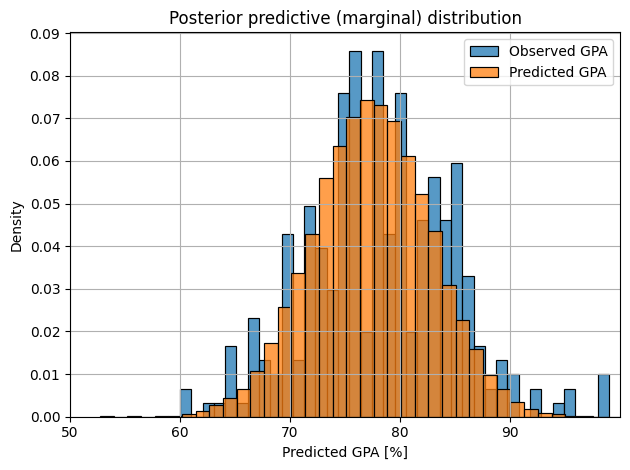

In [36]:
sns.histplot(data['Current GPA'], bins=len(data['Current GPA'].unique()), stat='density')
sns.histplot(model_fit_1.stan_variable('predicted_gpa').flatten(), bins=len(data['Current GPA'].unique()), stat='density')
plt.title(f'Posterior predictive (marginal) distribution')
plt.xlabel('Predicted GPA [%]')
plt.legend(['Observed GPA', 'Predicted GPA'])
plt.tight_layout()
plt.xticks(range(50, 100, 10))
plt.yticks(np.linspace(0, 0.09, 10))
plt.xlim(50, 100)
plt.grid()
plt.show()

Samples for the posterior predictive distributiion were generated. The histograms are consistent with our expectations, a cleary influence of studying hours and drinks on the GPA is visible. The marginal distribution fits the observed data.

The posterior predictive distribution of the coefficients is more concentrated around the mean value.

## 6. Posterior analysis for the second model

For the second model, when sampling, the biggest problem was the appropriate transformation of the predictors passed as shape factors in the beta distribution. After a longer analysis, the relationship and the impact of adding appropriate predictors to the given shape coefficients were found and the final version of the model was obtained on this basis.

### 6.1 Sampling for second model

In [37]:
posterior_model_2 = CmdStanModel(stan_file='src/posterior_model_2.stan')

scaled_gpa = data['Current GPA'][indexes] / 100

data_fit = {'N': 10, 
            'hours': (data['Studying hours'][indexes]),
            'hangouts': (data['Hangouts'][indexes]),
            'drinks': data['Drinks'][indexes],
            'scaled_gpa': scaled_gpa[indexes]}

model_fit_2 = posterior_model_2.sample(data=data_fit, seed=2024)

df_4 = model_fit_2.draws_pd()
df_4.head()

21:49:04 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

21:49:04 - cmdstanpy - INFO - CmdStan done processing.
21:49:04 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: lognormal_lpdf: Random variable is -0.321073, but must be nonnegative! (in 'posterior_model_2.stan', line 32, column 4 to column 35)
	Exception: posterior_model_2_model_namespace::log_prob: alpha_param[1] is -1.85404, but must be greater than or equal to 0.000000 (in 'posterior_model_2.stan', line 19, column 4 to column 39)
	Exception: posterior_model_2_model_namespace::log_prob: alpha_param[1] is -1.79447, but must be greater than or equal to 0.000000 (in 'posterior_model_2.stan', line 19, column 4 to column 39)
	Exception: posterior_model_2_model_namespace::log_prob: alpha_param[1] is -1.4952, but must be greater than or equal to 0.000000 (in 'posterior_model_2.stan', line 19, column 4 to column 39)
	Exception: posterior_model_2_model_namespace::log_prob: beta_param[5] is -3.31915, but must be greater than or equal to 0.000000 (in 'posterior_model_2.stan

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,...,log_likelihood[1],log_likelihood[2],log_likelihood[3],log_likelihood[4],log_likelihood[5],log_likelihood[6],log_likelihood[7],log_likelihood[8],log_likelihood[9],log_likelihood[10]
0,1.0,1.0,1.0,3.94928,0.861000,0.712464,3.0,7.0,0.0,-1.036820,...,1.90824,1.72715,1.89528,1.90394,1.89007,0.955849,1.87652,0.197856,1.51956,1.90824
1,1.0,2.0,2.0,3.94928,0.619320,0.712464,2.0,3.0,0.0,1.034910,...,1.90824,1.72715,1.89528,1.90394,1.89007,0.955849,1.87652,0.197856,1.51956,1.90824
2,1.0,3.0,3.0,3.71067,0.692489,0.712464,3.0,7.0,0.0,0.163136,...,1.96585,1.64195,1.95144,1.90742,1.83743,1.087080,1.87279,0.416366,1.37159,1.96585
3,1.0,4.0,4.0,2.35351,0.879320,0.712464,2.0,3.0,0.0,-1.535660,...,1.98143,1.57263,1.97077,1.88505,1.80284,1.204400,1.84424,0.605693,1.25219,1.98143
4,1.0,5.0,5.0,3.78315,0.998577,0.712464,2.0,3.0,0.0,-1.527440,...,1.96917,1.61546,1.95784,1.89940,1.83553,1.112160,1.86267,0.489333,1.34593,1.96917


### 6.2 Posterior predictive checks for parameters and measurements

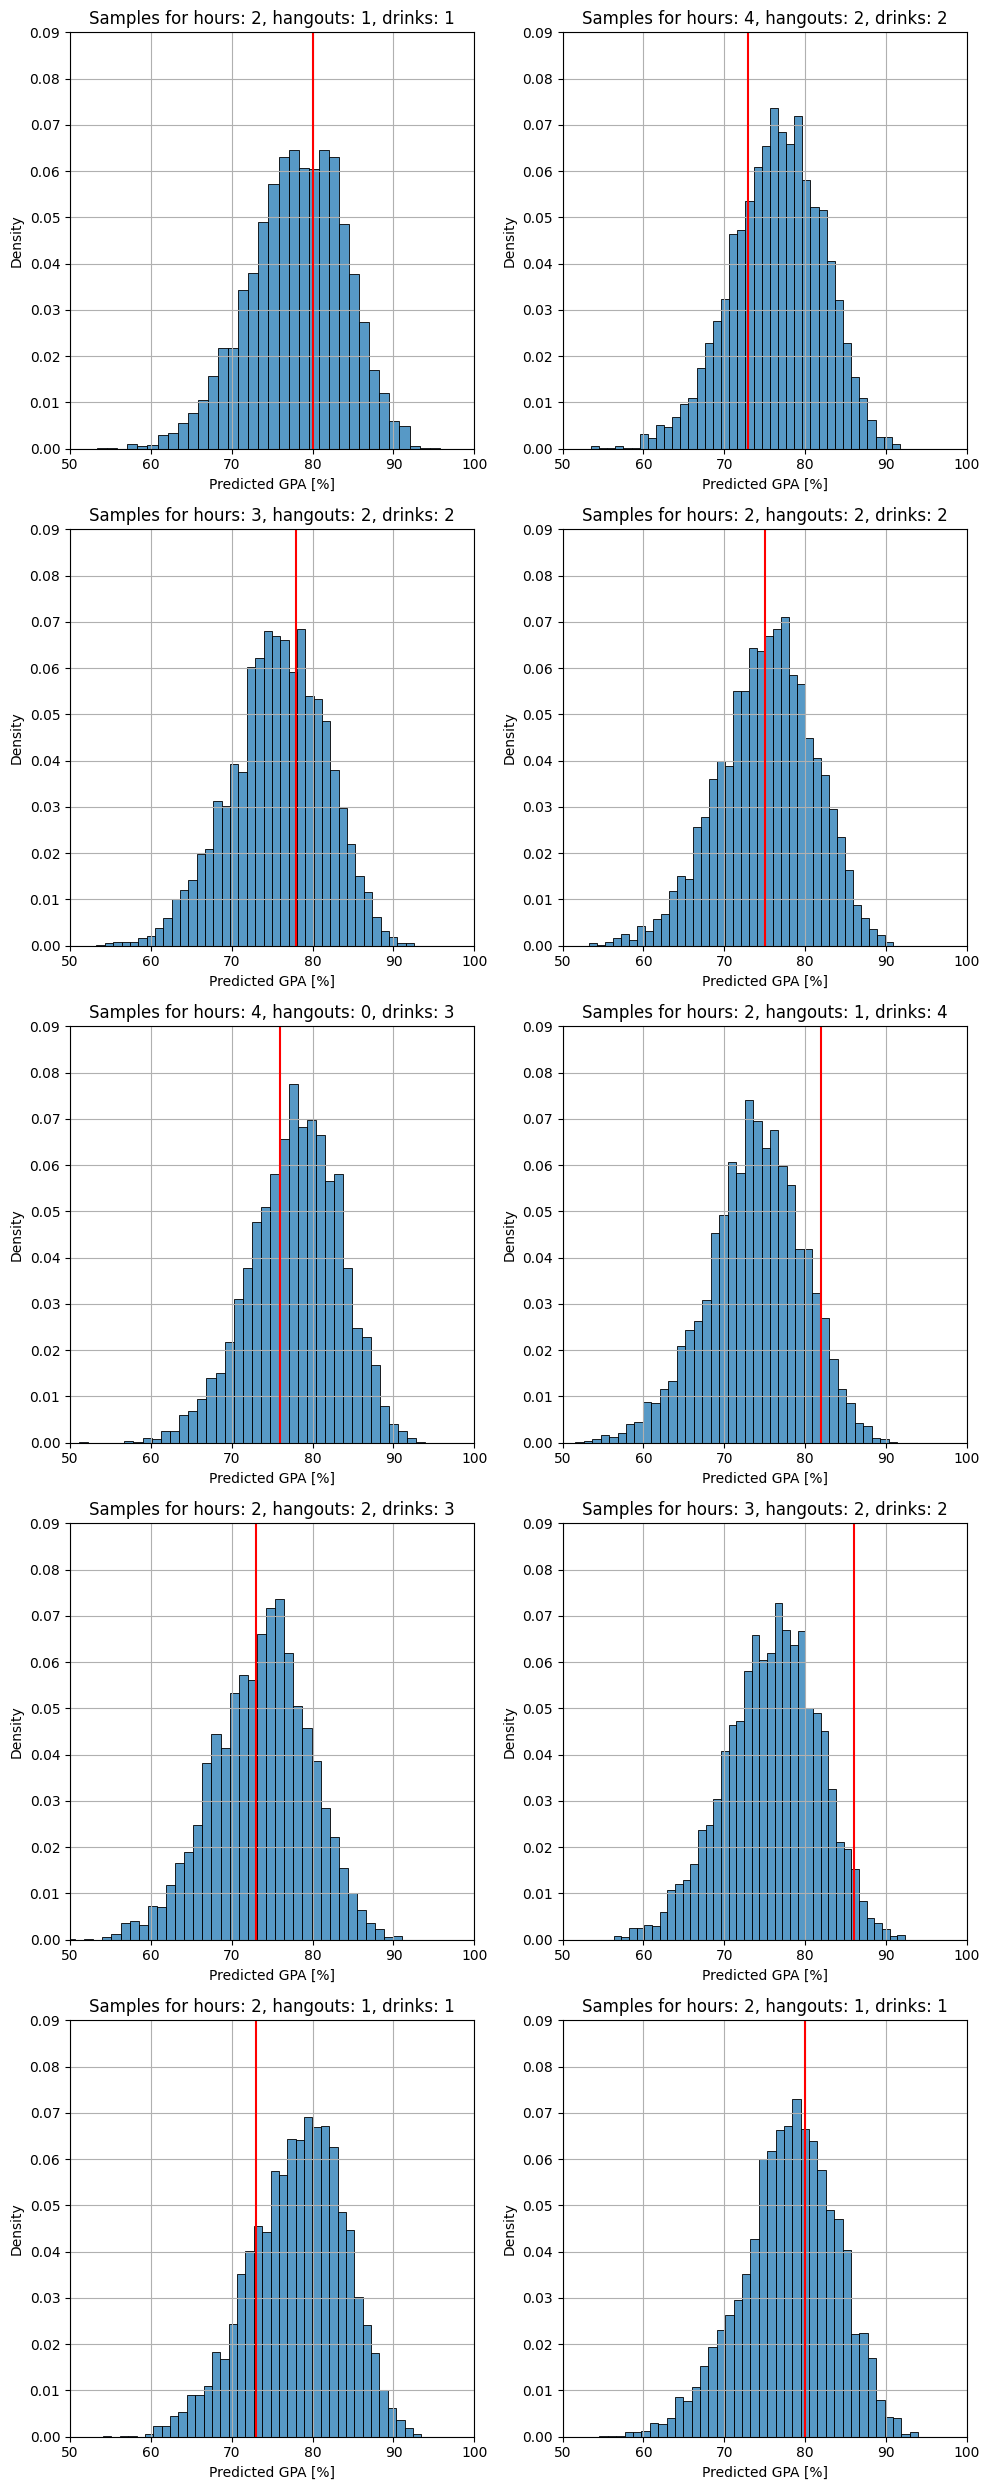

In [53]:
columns = [f'predicted_scaled_gpa[{i+1}]' for i in range(10)]

fig, axes = plt.subplots(5, 2, figsize=(10, 25))

for i, column in enumerate(columns):    
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(df_4[column] * 100, ax=ax, bins=len(data['Current GPA'].unique()), stat='density')
    ax.axvline(x = data['Current GPA'][indexes[i]],  ymin = 0, ymax = 1, color='red') # Top of the plot
    
    ax.set_title(f'Samples for hours: {data["Studying hours"][indexes[i]]}, hangouts: {data["Hangouts"][indexes[i]]}, drinks: {data["Drinks"][indexes[i]]}')
    ax.set_xlabel('Predicted GPA [%]')
    ax.set_xticks(range(50, 101, 10))
    ax.set_xlim(50, 100)
    ax.set_yticks(np.linspace(0, 0.09, 10))
    ax.grid()

plt.tight_layout()
plt.show()

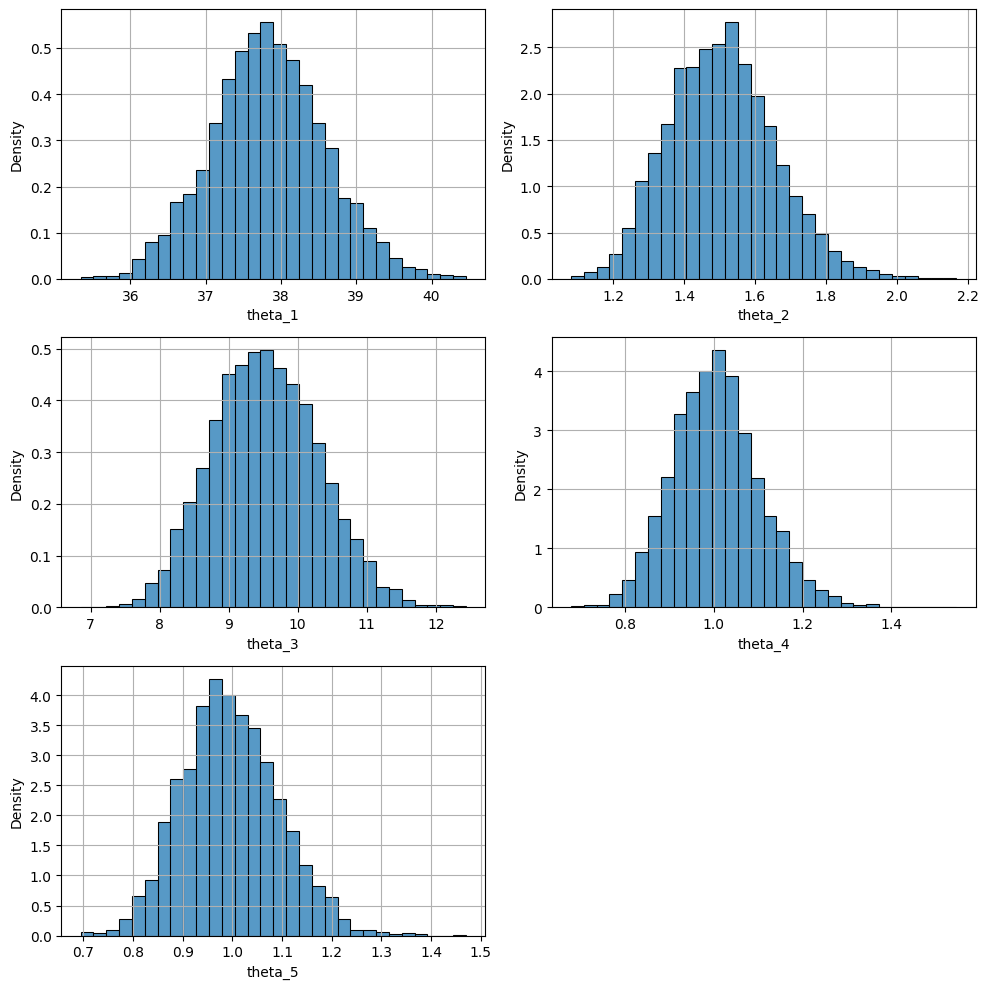

In [39]:
parameters = ['theta_1', 'theta_2', 'theta_3', 'theta_4', 'theta_5']

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, param in enumerate(parameters):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(df_4[param], ax=ax, bins=30, stat='density')
    ax.grid()
    

fig.delaxes(axes[2][1])
plt.tight_layout()
plt.show()

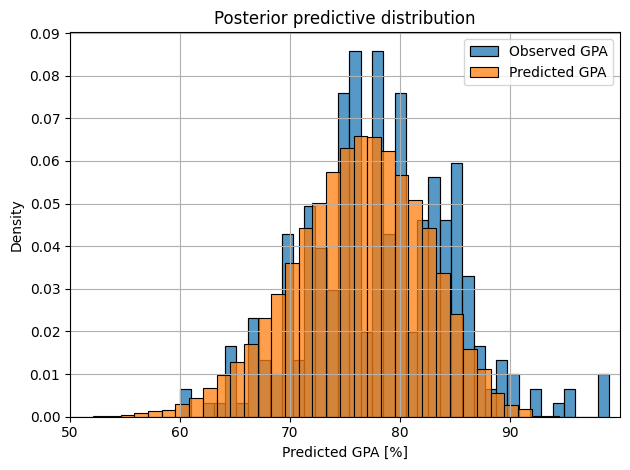

In [40]:
sns.histplot(data['Current GPA'], bins=len(data['Current GPA'].unique()), stat='density')
sns.histplot(model_fit_2.stan_variable('predicted_scaled_gpa').flatten() * 100, bins=len(data['Current GPA'].unique()), stat='density')
plt.title(f'Posterior predictive distribution')
plt.xlabel('Predicted GPA [%]')
plt.legend(['Observed GPA', 'Predicted GPA'])
plt.tight_layout()
plt.xticks(range(50, 100, 10))
plt.yticks(np.linspace(0, 0.09, 10))
plt.xlim(50, 100)
plt.grid()
plt.show()

Again samples for the posterior predictive distributiion were generated. The histograms are consistent with our expectations, a cleary influence of studying hours and drinks on the GPA is visible. The marginal distribution fits the observed data, a beta distribution shape is visable.

The posterior predictive distribution of the coefficients is more concentrated around the mean value.

## 7. Model comparison

### 7.1 Comparing using information criteria

In [41]:
fit1_az = az.from_cmdstanpy(posterior=model_fit_1,
                            log_likelihood='log_likelihood',
                            posterior_predictive='predicted_gpa',
                            observed_data={'kid_value': data["Current GPA"]})

fit2_az = az.from_cmdstanpy(posterior=model_fit_2,
                            log_likelihood='log_likelihood',
                            posterior_predictive='predicted_scaled_gpa',
                            observed_data={'kid_value': data["Current GPA"] / 100})

In [42]:
fit1_az

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

In [43]:
fit2_az

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

In [44]:
print(az.waic(fit1_az, pointwise=True))
print(az.waic(fit2_az, pointwise=True))

Computed from 4000 posterior samples and 10 observations log-likelihood matrix.

          Estimate       SE
elpd_waic   -30.32     1.54
p_waic        0.85        -
Computed from 4000 posterior samples and 10 observations log-likelihood matrix.

          Estimate       SE
elpd_waic    15.54     1.71
p_waic        0.33        -


In [45]:
print(az.loo(fit1_az, pointwise=True))
print(az.loo(fit2_az, pointwise=True))

Computed from 4000 posterior samples and 10 observations log-likelihood matrix.

         Estimate       SE
elpd_loo   -30.32     1.54
p_loo        0.86        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       10  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

Computed from 4000 posterior samples and 10 observations log-likelihood matrix.

         Estimate       SE
elpd_loo    15.54     1.71
p_loo        0.33        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       10  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%



In [46]:
waic_comparison = az.compare({"model_normal_dist": fit1_az, "model_beta_dist": fit2_az}, ic="waic", scale="deviance")
loo_comparison = az.compare({"model_normal_dist": fit1_az, "model_beta_dist": fit2_az}, ic="loo", scale="deviance")

### 7.2 WAIC comparison results

The model_beta_dist has a significantly lower WAIC score -31.107998 compared to the model_normal_dist 60.866078, which suggest that it fits the data better.

The difference in WAIC scores relative to the best model is 91.44291, indicating it is significantly worse than model_beta_dist, which has a dWAIC of 0 by definition as it is the better model.

Both models have false warning status, meaning no issues were detected.

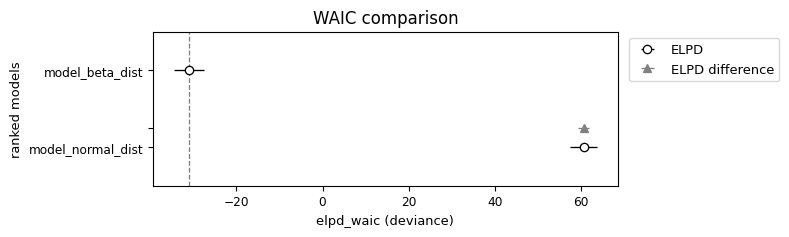

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
model_beta_dist,0,-31.071373,0.333634,0.00000,1.000000e+00,3.427491,0.000000,False,deviance
model_normal_dist,1,60.631436,0.846928,91.70281,5.968559e-13,3.081390,1.345612,False,deviance


In [47]:
az.plot_compare(waic_comparison)
plt.title("WAIC comparison")
plt.show()
waic_comparison

### 7.3 LOO comparison results

Same as with previous method, model_beta_dist is better fit than model_normal_dist.

Both models have false warning status, meaning no issues were detected.

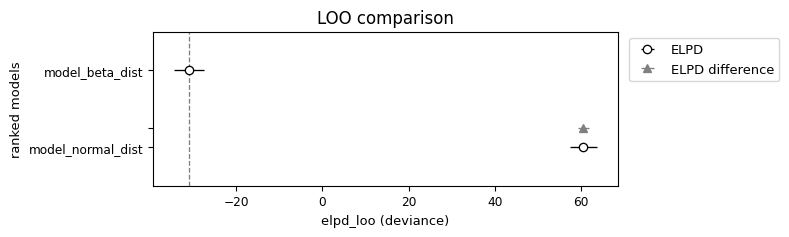

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model_beta_dist,0,-31.070247,0.334197,0.000000,1.000000e+00,3.427853,0.000000,False,deviance
model_normal_dist,1,60.649708,0.856064,91.719955,3.055334e-12,3.088634,1.344595,False,deviance


In [48]:
az.plot_compare(loo_comparison)
plt.title("LOO comparison")
plt.show()
loo_comparison

We expected model_beta_dist would better than model_normal_dist, and it was confirmed by both methods. As described in the justification of the both models, the beta distribution is more suitable because of its distribution shape flexibility and fixed domain range matching our purposes.

### 8. Summary

We mangaed to suscesfully create two different statistical models based on Bayesian approach to predict student's performance measured as GPA. The first model uses normal distribution for the predicted GPA, while the second model uses beta distribution. The second model is better fit to the data, as confirmed by both WAIC and LOO methods. The results of the models can be used to predict the GPA of students based on the number of hours spent studying, the number of socializing activities, and the average number of drinks consumed during them. The models can be used to identify the factors that have the greatest impact on student performance and to help students improve their academic performance by adjusting their behavior.